###### Employee Attrition Data
Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
previntive measures to stop or control the attrition.

###### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Loading and studying the dataset

In [2]:
hr_att = pd.read_csv("F:\DATA SCIENCE\MACHINE LEARNING\Capstone Project\HR_Employee_Attrition_Data.csv")

In [3]:
# Observing first 5 samples of the dataset
hr_att.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
# Dimensions of the dataset
hr_att.shape

(2940, 35)

There are 2940 employees data and having 35 columns (features + target variable)

In [5]:
# Information of the dataset
hr_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

- There are no null values present in the dataset.
- Most of the columns are of integer type (25) and 9 object / categorical type.

In [6]:
# Columns in the dataset
hr_att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Unique Values of each feature
for i in hr_att.columns:
    uni = hr_att[i].unique()
    print(f'Unique values in {i} column \n',uni,'\n')
        


Unique values in Age column 
 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

Unique values in Attrition column 
 ['Yes' 'No'] 

Unique values in BusinessTravel column 
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Unique values in DailyRate column 
 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957 

In [8]:
# Duplicate value check
hr_att.duplicated().sum()

0

There are no duplicate values in the dataset.

In [9]:
# Zero Variance check - Features having zero variance will have constant values and hence will have zero predictive power.
# Those columns will have to be removed.
col = hr_att.columns
zer_var_lst = []
for i in range(len(col)):
    if hr_att[col[i]].dtypes == 'int64' or hr_att[col[i]].dtypes == 'float64':
        if hr_att[col[i]].var() == 0:
            zer_var_lst.append(col[i])
print('Columns having zero variance are :-\n',zer_var_lst)

Columns having zero variance are :-
 ['EmployeeCount', 'StandardHours']


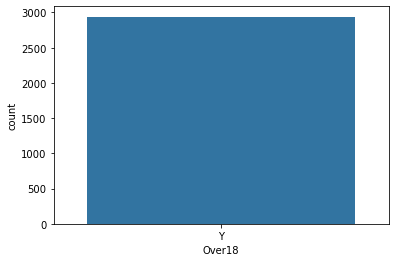

In [10]:
# Here we have not considered the categorical variables which may contain constant values, let's find them if any
# From unique values we observe 'Over 18' column has all same values which is 'Yes', hence this variable also will have 
# zero predictive power.
sns.countplot( x = hr_att['Over18'])
plt.show()

In [11]:
# Removing columns 'EmployeeCount' , 'Over18' and 'StandardHours'
hr = hr_att.drop(labels = ['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace= False)

In [12]:
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               3   
3                 3          4  Life Sciences               4   
4                 2          1        Medical               5   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

Now we have 32 columns from 35 in our updated dataset

In [13]:
# Descriptive Statistics
hr.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  2940.000000      2940.000000  ...        2940.000000   
mean      2.063946         2.728571  ...           3.153741   
std       1.106752         1.102658  ...           0.360762   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       3.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               2940.000000       2940.000000        2940.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081025          0.851932           7.779458   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

In [14]:
# Descriptive Statistics of categorical variables
hr.describe(include = 'object')

Attrition BusinessTravel              Department EducationField Gender  \
count       2940           2940                    2940           2940   2940   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        2466           2086                    1922           1212   1764   

                JobRole MaritalStatus OverTime  
count              2940          2940     2940  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                652          1346     2108

Here, we can clearly obeserve that all other categorical columns has more than one unique values and hence will have some 
predictive power.

In [15]:
# Studying the target variable
hr['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [16]:
# Checking balance of the dataset
no_of_yes = round(len(hr[hr['Attrition'] == 'Yes'])/len(hr['Attrition'])*100,2)
no_of_nos = round(len(hr[hr['Attrition'] == 'No'])/len(hr['Attrition'])*100,2)
print('Percentage of Positive class (Yes) or Event Rate = ',no_of_yes,'%')
print('Percentage of Negative class (No) or Event Rate = ',no_of_nos,'%')

Percentage of Positive class (Yes) or Event Rate =  16.12 %
Percentage of Negative class (No) or Event Rate =  83.88 %


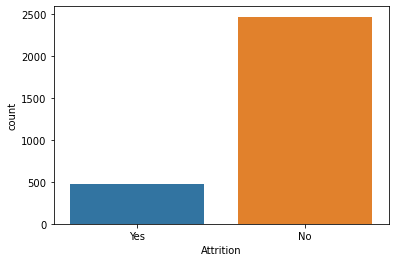

In [17]:
# Visualizing the balance of classes - using countplot
sns.countplot(x = hr['Attrition'])
plt.show()

- Here we can observe that Event Rate or no. of postive classes are very less as compared to negative classes. Hence, this
  is imbalanced class dataset.
- Hence, we have to keep in mind that accuracy may not be good performance measure of the model. We have to focus on the 
  other metrices such Recall, Precision and F1 score.
- We may also use to convert it into balanced class dataset by using oversampling , undersampling combination of
  undersampling and oversampling techniques , SMOTE (Synthetic Minority Oversampling Technique) techniques thorugh    'imbalanced learn library' from python but these are not that effective as they may tend to create biasness and duplicacy     in the dataset and model may not perform well in production stage. Hence, we will avoid these techniques as of now.

###### Univariate Analysis

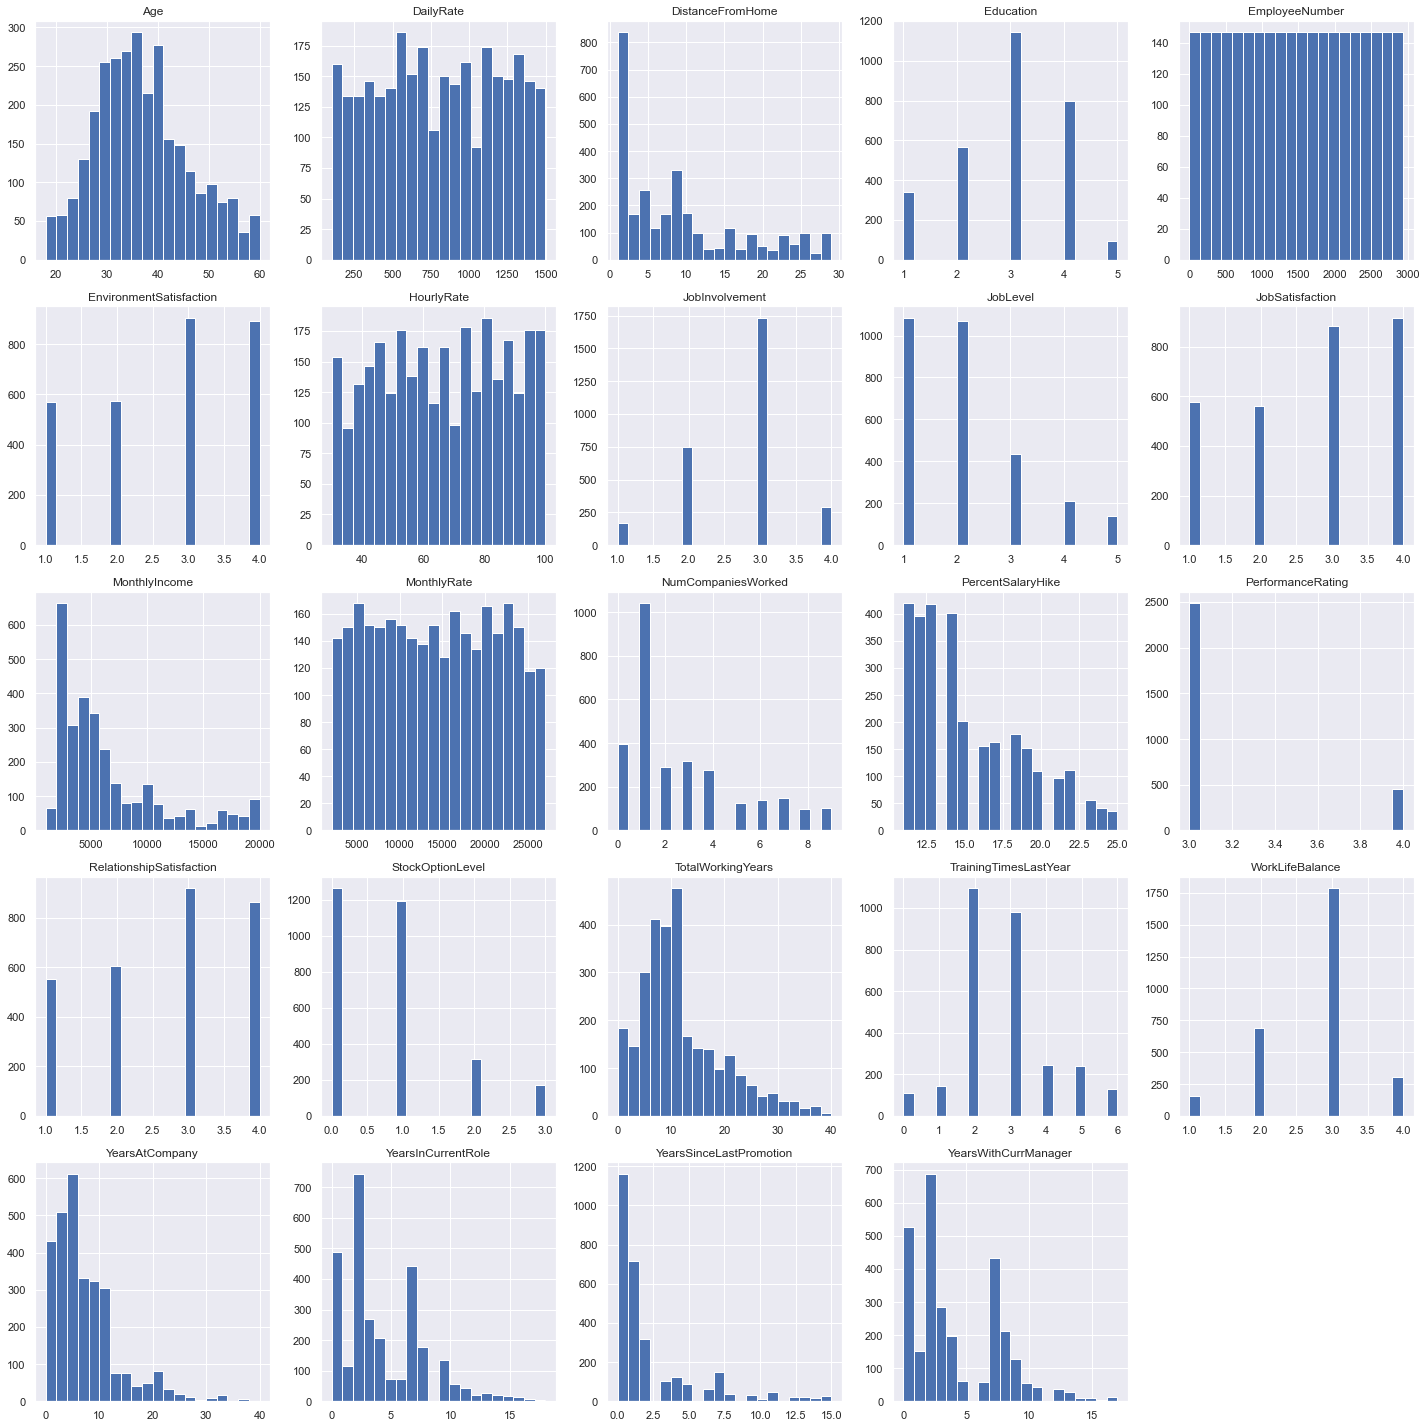

<Figure size 720x288 with 0 Axes>

In [18]:
# Plotting distribution plot - using histogram
sns.set_theme()
hr.hist(figsize = (20,20), bins = 20)
plt.tight_layout()
plt.figure(figsize = (10,4))
plt.show()

- 'Age' , 'Education' , 'TrainingTimesLastYear' variable follows normal distribution
- 'Employee' variable has uniform distribution
- 'Daily Rate', 'Hourly Rate', 'Monthly Rate' follows approx. uniform distribution.
- Rest of the target variables are right skewed in distribution.

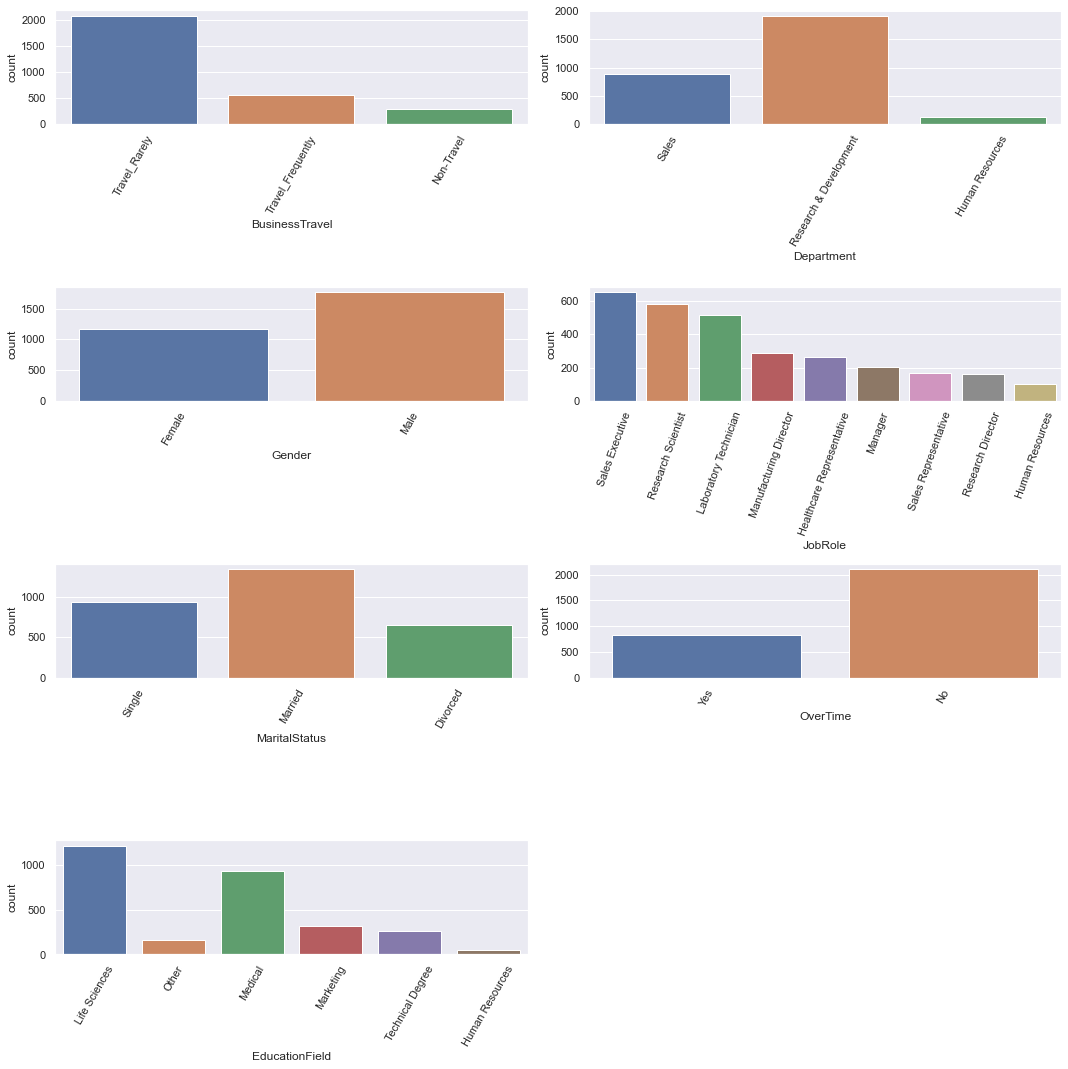

In [19]:
# Observing frequencies of categorical variables values  (excluding target variable : 'Attrition')- using countplot
plt.figure(figsize = (15,15))
sns.set_theme()
plt.subplot(4,2,1)
sns.countplot(x = hr['BusinessTravel'])
plt.xticks(rotation = 60)
plt.subplot(4,2,2)
sns.countplot(x = hr['Department'])
plt.xticks(rotation = 60)
plt.subplot(4,2,3)
sns.countplot(x = hr['Gender'])
plt.xticks(rotation = 60)
plt.subplot(4,2,4)
sns.countplot(x = hr['JobRole'])
plt.xticks(rotation = 70)
plt.subplot(4,2,5)
sns.countplot(x = hr['MaritalStatus'])
plt.xticks(rotation = 60)
plt.subplot(4,2,6)
sns.countplot(x = hr['OverTime'])
plt.xticks(rotation = 60)
plt.subplot(4,2,7)
sns.countplot(x = hr['EducationField'])
plt.xticks(rotation = 60)
plt.tight_layout()

- First count plot shows high no. of employees who travel rarely.
- Second count plot shows most employees belong to R&D department.
- Third count plot shows most employees are male.
- Forth plot shows that most employees are having Sales executive and research scientist as job role.
- Fifth plot shows that most employees are married.
- Sixth plot depicts that most employees don't do overtime.
- Seventh plot shows that most employees have 'Life Sciences' as their education field.

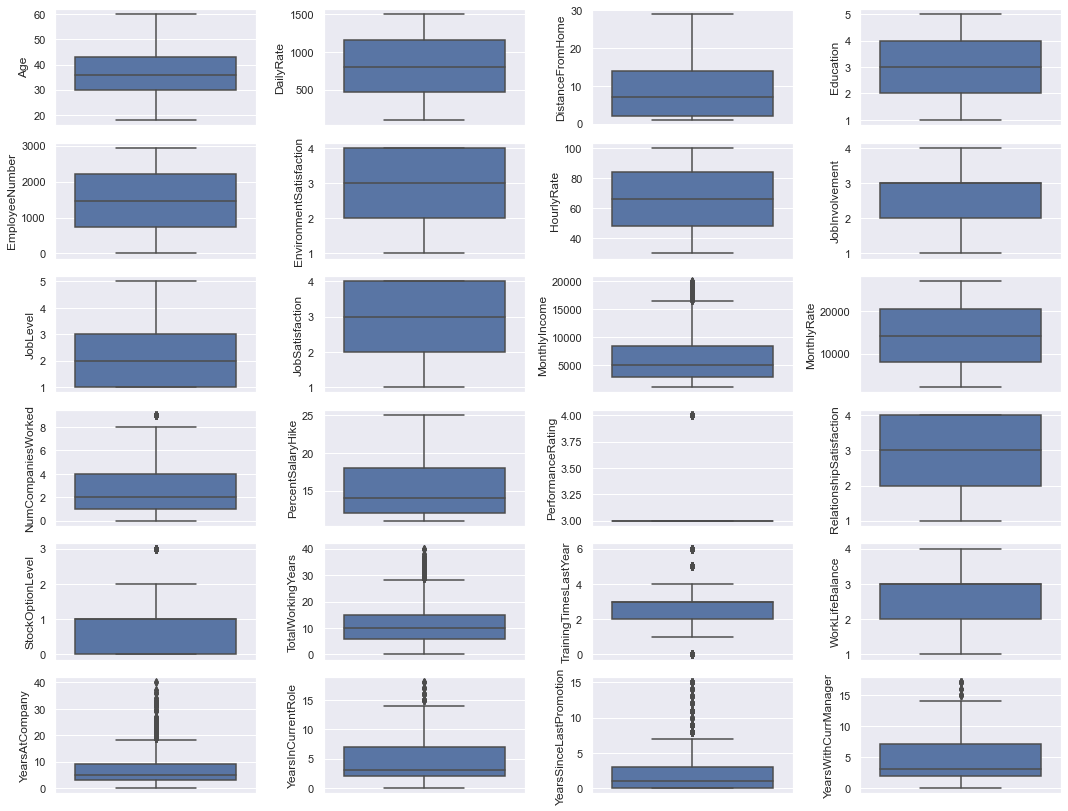

In [20]:
# Outlier Analysis - using Boxplot
plt.figure(figsize = (15,15))
sns.set_theme()
col1 = hr.columns
num_col = []
for i in range(0,len(col1)):
    if ((hr[col1[i]].dtypes == 'int64') or (hr[col1[i]].dtypes == 'float64')):
        num_col.append(col1[i])
for j in range(1,len(num_col) + 1):
    plt.subplot(8,4,j)
    sns.boxplot(y = hr[num_col[j - 1]], orient = 'v')
    plt.tight_layout()

In [21]:
# Cross verification of outlier presence through histogram and countplots.

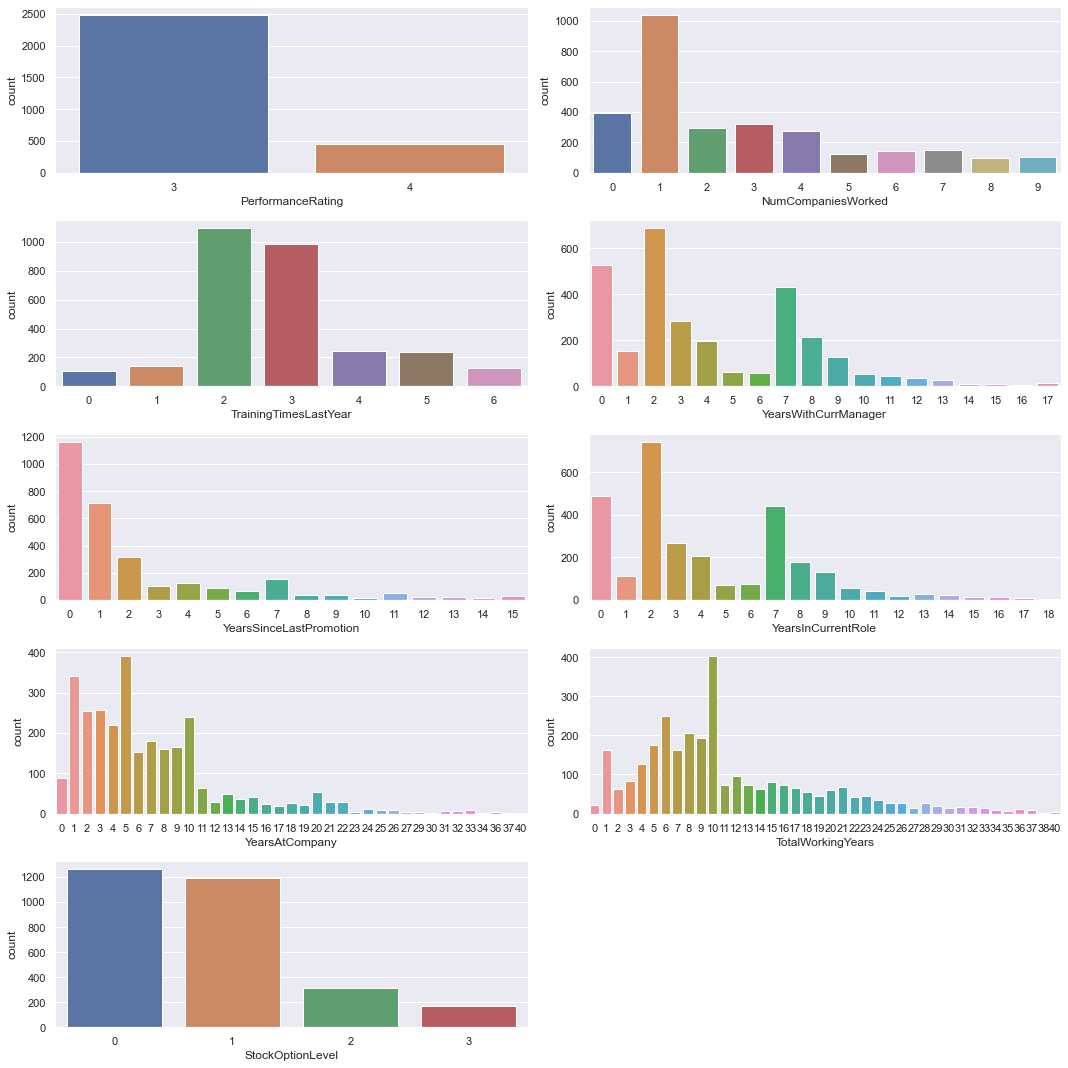

In [22]:
o_col = ['PerformanceRating','NumCompaniesWorked','TrainingTimesLastYear','YearsWithCurrManager','YearsSinceLastPromotion',
         'YearsInCurrentRole','YearsAtCompany','TotalWorkingYears','StockOptionLevel']
plt.figure(figsize = (15,15))
sns.set_theme()
for i in range(1,len(o_col)+1):
    plt.subplot(5,2,i)
    sns.countplot(x = hr[o_col[i -1]])
    plt.tight_layout()

- By seeing the boxplot of 'PerformanceRating', we can assume that there are outliers.
- But as we look into it's count plot we can see that there are categorical fairly reasonable values 3 and 4, which are not
  outliers. So we won't remove them.
- By seeing the boxplot of 'NumCompaniesWorked', we can assume that there are outliers.
- But as we look into it's count plot we can see that there are categorical fairly reasonable values from 0 to 9 companies   worked, which are not outliers. So we won't remove them.
- Same inference can be drawn for TrainingTimesLast Year, as this is also categorical variable, we won't remove outliers on
  basis of boxplot.
- Here both count plot along with boxplot of 'YearWithCurrManager' variable justify outliers presence.
- Here both count plot along with boxplot of 'YearWithCurrManager' variable justify outliers presence.
- Here both count plot along with boxplot of 'YearsInCurrentRole' variable justify outliers presence.
- Here both count plot along with boxplot of 'YearsAtCompany' variable justify outliers presence
- Here both count plot along with boxplot of 'TotalWorkingYears' variable justify outliers presence.
- By seeing the boxplot of 'StockOptionLevel', we can assume that there are outliers.
- But as we look into it's count plot we can see that there are categorical fairly reasonable values from 0 to 3, which are   not outliers. So we won't remove them.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

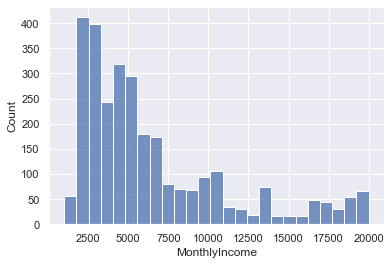

In [23]:
# Cross verification of outlier presence in 'MonthlyIncome' column using histogram
sns.histplot(hr['MonthlyIncome'])

- Boxplot of 'MonthlyIncome' shows outlier presence.
- However, from histogram of 'MonthlyIncome', we can't see clear outlier observations as there resonable no. of employees having monthly income of about 20,000. So, we won't remove them as of now.

###### Summarizing on the basis of boxplot, histogram and count plot, we will do outlier treatment on following variables :-
- 'YearsWithCurrManager'
- 'YearsSinceLastPromotion'
- 'YearsInCurrentRole'
- 'YearsAtCompany'
- 'TotalWorkingYears'

In [24]:
# Creating outlier threshold function - using IQR method
def outlier_removal(col):
    Q1 , Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_obs = Q1 - 1.5*IQR
    higher_obs = Q3 + 1.5*IQR
    return lower_obs , higher_obs

In [25]:
# Creating outlier thresholds for columns - 'YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole',
# 'YearsAtCompany','TotalWorkingYears'
lower_ywcm, higher_ywcm = outlier_removal(hr['YearsWithCurrManager'])
lower_yslp, higher_yslp = outlier_removal(hr['YearsSinceLastPromotion'])
lower_yicr, higher_yicr = outlier_removal(hr['YearsInCurrentRole'])
lower_yac, higher_yac = outlier_removal(hr['YearsAtCompany'])
lower_twy, higher_twy = outlier_removal(hr['TotalWorkingYears'])

In [26]:
# Removing outliers from all susceptible columns will get into large amount of data loss.
# Hence, Clipping outlier values in columns 'YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany'
# and 'TotalWorkingYears'to min. and max. values
hr['YearsWithCurrManager'] = hr['YearsWithCurrManager'].apply(lambda x : lower_ywcm if (x < lower_ywcm) else higher_ywcm if (x > higher_ywcm) else x)
hr['YearsSinceLastPromotion'] = hr['YearsSinceLastPromotion'].apply(lambda x : lower_yslp if (x < lower_ywcm) else higher_yslp if (x > higher_yslp) else x)
hr['YearsInCurrentRole'] = hr['YearsInCurrentRole'].apply(lambda x : lower_yicr if (x < lower_yicr) else higher_yicr if (x > higher_yicr) else x)
hr['YearsAtCompany'] = hr['YearsAtCompany'].apply(lambda x : lower_yac if (x < lower_yac) else higher_yac if (x > higher_yac) else x)
hr['TotalWorkingYears'] = hr['TotalWorkingYears'].apply(lambda x : lower_twy if (x < lower_twy) else higher_twy if (x > higher_twy) else x)

In [27]:
# Reverifying outlier treatment of above variables through visualization

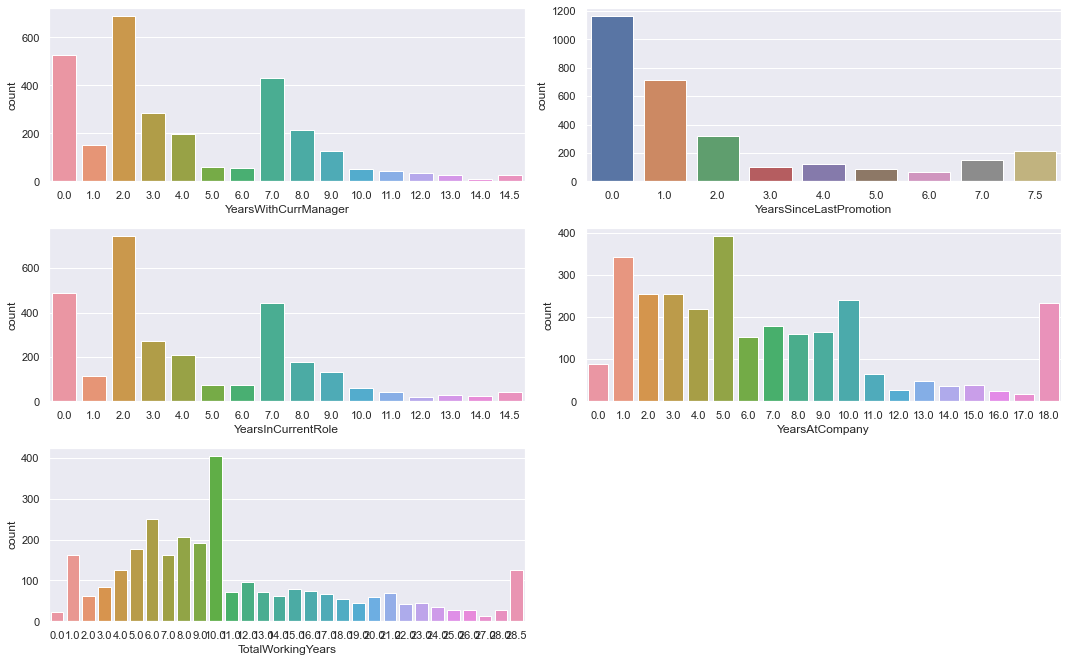

In [28]:
ot_col = ['YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears']
plt.figure(figsize = (15,15))
sns.set_theme()
for i in range(1,len(ot_col)+1):
    plt.subplot(5,2,i)
    sns.countplot(x = hr[ot_col[i - 1]])
    plt.tight_layout()

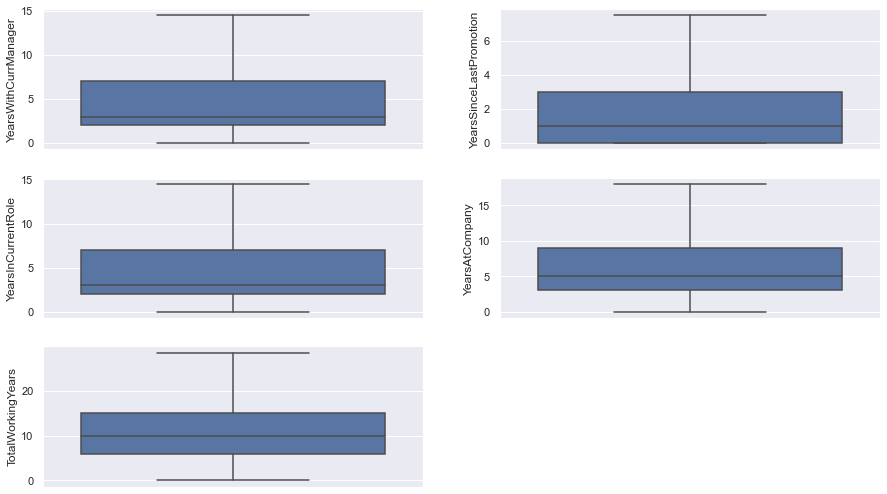

In [29]:
ot_col = ['YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears']
plt.figure(figsize = (15,15))
sns.set_theme()
for i in range(1,len(ot_col)+1):
    plt.subplot(5,2,i)
    sns.boxplot(y = hr[ot_col[i - 1]], orient = 'v')

From visualizing count and box plots , we can confirm of outlier treatment on those columns

###### Bivariate Analysis

In [30]:
# Defining plot function for bivariate analysis (Distribution plot + Boxplot)
def bivariate_plot(col_x,col_y):
    plt.figure(figsize = (10,4))
    sns.set_theme()
    plt.subplot(1,2,1)
    sns.kdeplot(x = hr[col_x], hue = hr[col_y])
    plt.subplot(1,2,2)
    sns.boxplot(x = hr[col_y], y = hr[col_x])
    plt.tight_layout()
    plt.show()

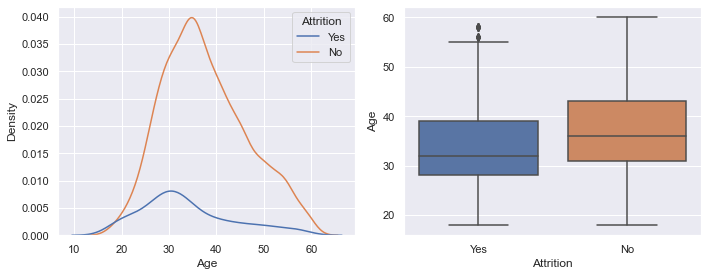

In [31]:
# Observing relation between Attrition (target variable) v/s Age
bivariate_plot('Age','Attrition')

- Age of employees around 30 years old tend to have more attrition rate as compared to other ages

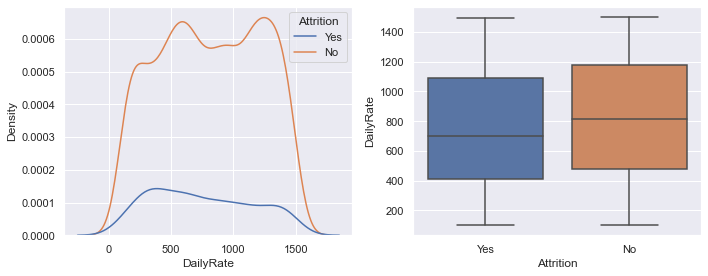

In [32]:
# Observing relation between Attrition (target variable) v/s DailyRate
bivariate_plot('DailyRate','Attrition')

- We can see that employees having lesser DailyRate have more Attrition Rate.

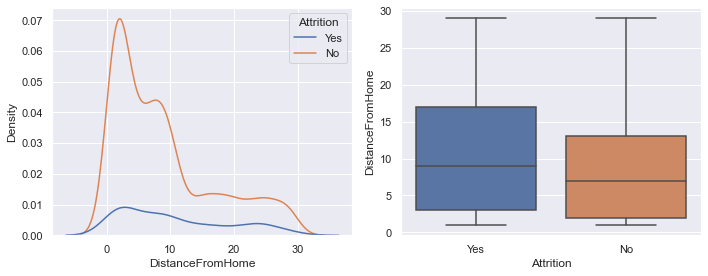

In [33]:
# Observing relation between Attrition (target variable) v/s DistanceFromHome
bivariate_plot('DistanceFromHome','Attrition')

- We can observe from boxplot that employees whose home distance range was far from office tend to have more Attrition.

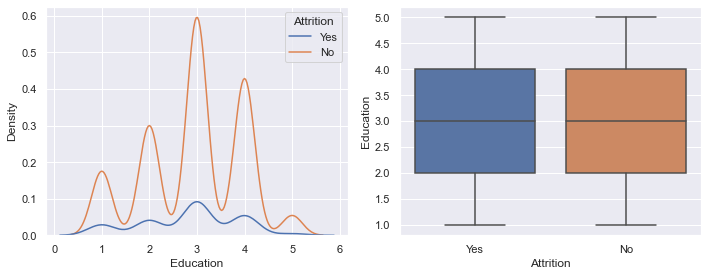

In [34]:
# Observing relation between Attrition (target variable) v/s Education
bivariate_plot('Education','Attrition')

- We can observe that employees Education doesn't affect the Attrition rate. Education variable doesn't depict much about the employee Attrition.

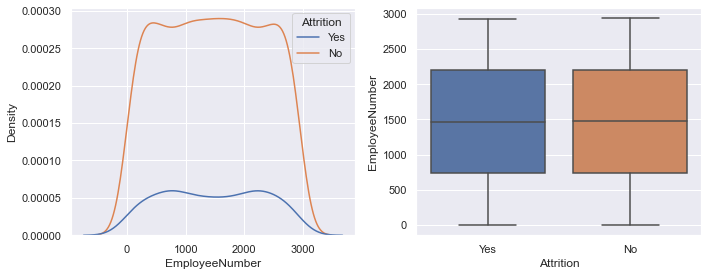

In [35]:
# Observing relation between Attrition (target variable) v/s Education
bivariate_plot('EmployeeNumber','Attrition')

- It is but obvious that employee number doesn't depict anything.
- Better we make remove it.

In [36]:
# Deleting EmployeeNumber column
hr = hr.drop('EmployeeNumber', axis = 1)

In [37]:
print('Columns = ',hr.columns,'\n','No. of columns =',len(hr.columns))

Columns =  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 
 No. of columns = 31


In [38]:
# Defining plot function for bivariate analysis (Barplot + Boxplot)
def bivariate_plot1(col_x,col_y):
    plt.figure(figsize = (10,4))
    sns.set_theme()
    plt.subplot(1,3,1)
    sns.countplot(x = hr[col_x], hue = hr[col_y])
    plt.subplot(1,3,2)
    sns.boxplot(x = hr[col_x], y = hr[col_y])
    plt.tight_layout()
    plt.show()

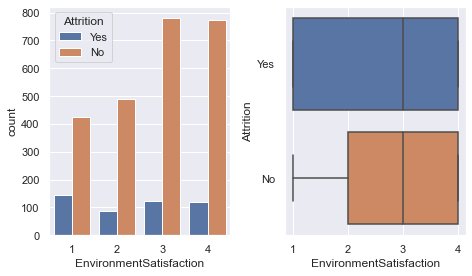

Attrition Rate of employees rating Job Environment Satisfaction as 1 = 25.35 %
Attrition Rate of employees rating Job Environment Satisfaction as 2 = 14.98 %
Attrition Rate of employees rating Job Environment Satisfaction as 3 = 13.69 %
Attrition Rate of employees rating Job Environment Satisfaction as 4 = 13.45 %


In [39]:
# Observing relation between 'EnvironmentSatisfaction' and 'Attrition'
bivariate_plot1('EnvironmentSatisfaction','Attrition')

envsat1_att_rate = round(len(hr[(hr['EnvironmentSatisfaction'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['EnvironmentSatisfaction'] == 1])*100,2)
print('Attrition Rate of employees rating Job Environment Satisfaction as 1 =',envsat1_att_rate,'%')

envsat2_att_rate = round(len(hr[(hr['EnvironmentSatisfaction'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['EnvironmentSatisfaction'] == 2])*100,2)
print('Attrition Rate of employees rating Job Environment Satisfaction as 2 =',envsat2_att_rate,'%')

envsat3_att_rate = round(len(hr[(hr['EnvironmentSatisfaction'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['EnvironmentSatisfaction'] == 3])*100,2)
print('Attrition Rate of employees rating Job Environment Satisfaction as 3 =',envsat3_att_rate,'%')

envsat4_att_rate = round(len(hr[(hr['EnvironmentSatisfaction'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['EnvironmentSatisfaction'] == 4])*100,2)
print('Attrition Rate of employees rating Job Environment Satisfaction as 4 =',envsat4_att_rate,'%')

- We caan observe that employees who rated Job Environment Satisfaction in low range (1,2) cover higher attrition rate

Percentage of employees who got Attrited and are female  = 14.8 %
Percentage of employees who got Attrited and are male  = 17.01 %


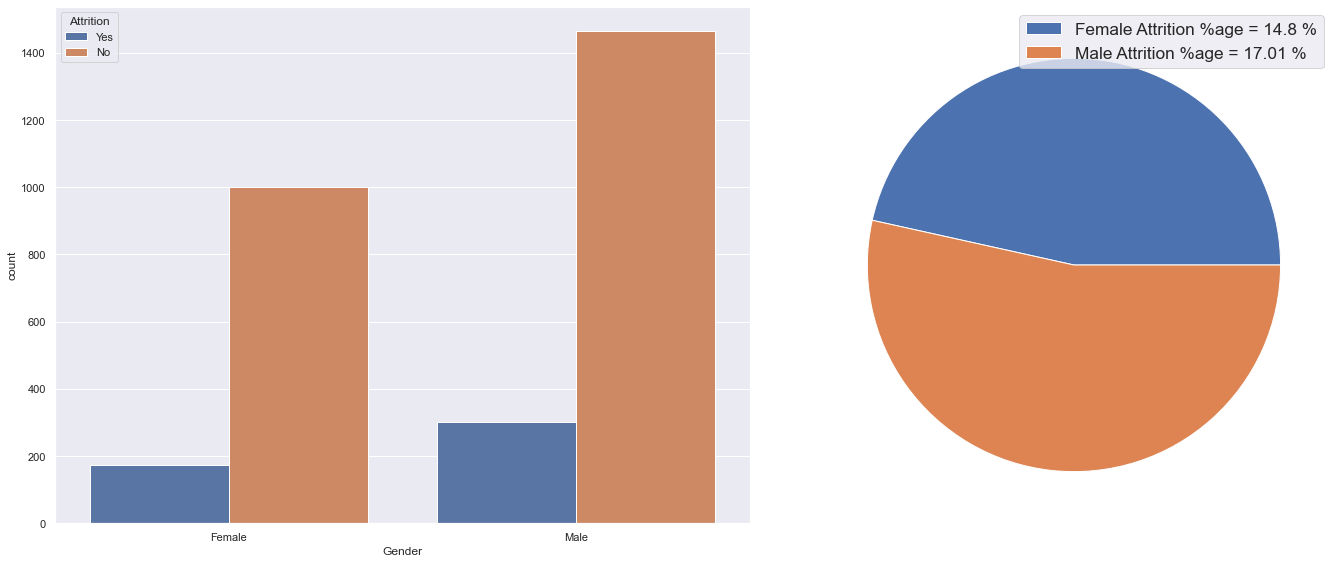

In [40]:
# Observing relation between 'Gender' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['Gender'], hue = hr['Attrition'])

female_att_percent = round(len(hr[(hr['Attrition'] == 'Yes') & (hr['Gender'] == 'Female')]) / len(hr[hr['Gender'] == 'Female'])*100,2)
print(f'Percentage of employees who got Attrited and are female  = {female_att_percent}','%')

male_att_percent = round(len(hr[(hr['Attrition'] == 'Yes') & (hr['Gender'] == 'Male')]) / len(hr[hr['Gender'] == 'Male'])*100,2)
print(f'Percentage of employees who got Attrited and are male  = {male_att_percent}','%')

plt.subplot(1,2,2)
plt.pie(x = [female_att_percent, male_att_percent])
plt.legend(fontsize = 'x-large',labels = [f'Female Attrition %age = {female_att_percent} %', f'Male Attrition %age = {male_att_percent} %'] , loc = 'best')
plt.tight_layout()
plt.show()

- We can observe that male employees have attrited more as compared to female employees.

Percent of employees who travelled rarely and were attrited =  14.96 %
Percent of employees who travelled frequently and were attrited =  24.91 %
Percent of employees who didn't travel and were attrited =  8.0 %


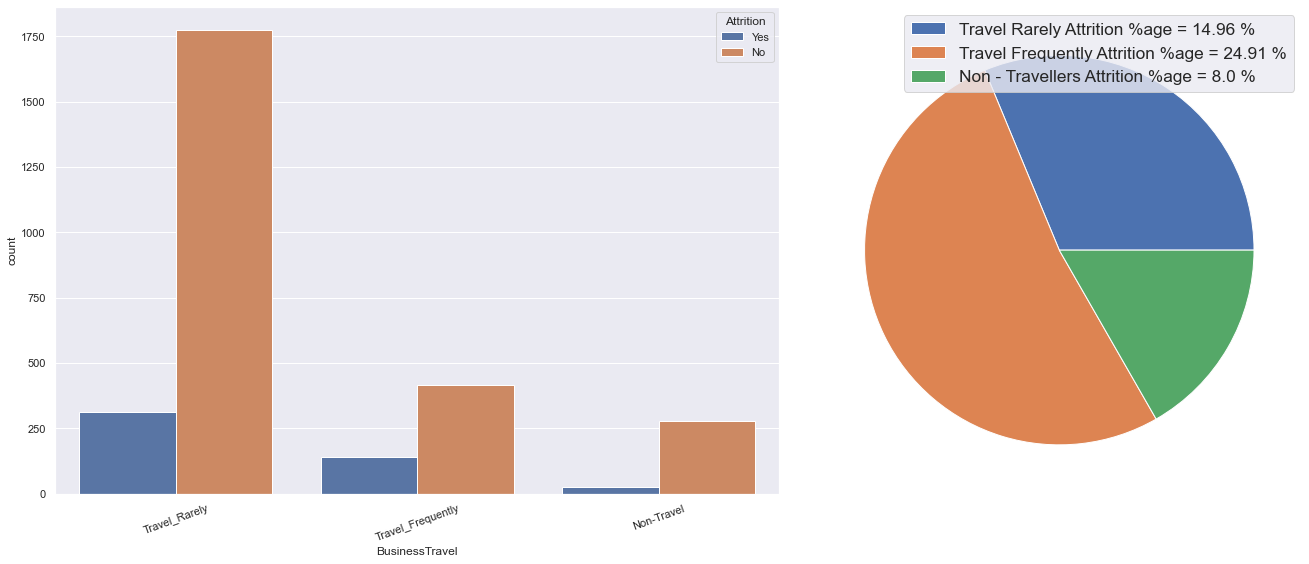

In [41]:
# Observing relation between 'BusinessTravel' and 'Attrition'
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot( x= hr['BusinessTravel'], hue = hr['Attrition'])
plt.xticks(rotation = 20)
plt.tight_layout()
travel_rarely_att_percent = round(len(hr[(hr['BusinessTravel'] == 'Travel_Rarely') & (hr['Attrition'] == 'Yes')])/len(hr[hr['BusinessTravel'] == 'Travel_Rarely'])*100,2)
print('Percent of employees who travelled rarely and were attrited = ',travel_rarely_att_percent,'%')

travel_freq_att_percent = round(len(hr[(hr['BusinessTravel'] == 'Travel_Frequently') & (hr['Attrition'] == 'Yes')])/len(hr[hr['BusinessTravel'] == 'Travel_Frequently'])*100,2)
print('Percent of employees who travelled frequently and were attrited = ',travel_freq_att_percent,'%')

non_travel_att_percent = round(len(hr[(hr['BusinessTravel'] == 'Non-Travel') & (hr['Attrition'] == 'Yes')])/len(hr[hr['BusinessTravel'] == 'Non-Travel'])*100,2)
print('Percent of employees who didn\'t travel and were attrited = ',non_travel_att_percent,'%')

plt.subplot(1,2,2)
plt.pie(x = [travel_rarely_att_percent, travel_freq_att_percent, non_travel_att_percent])
plt.legend(fontsize = 'x-large',labels = [f'Travel Rarely Attrition %age = {travel_rarely_att_percent} %', f'Travel Frequently Attrition %age = {travel_freq_att_percent} %', f'Non - Travellers Attrition %age = {non_travel_att_percent} %'],loc = 'best')
plt.tight_layout()
plt.show()

- We can observe that people who travelled frequently had a higher attrition rate.

Sales dept. employees attrition rate =  20.63 %
R&D dept. employees attrition rate =  13.84 %
HR dept. employees attrition rate =  19.05 %


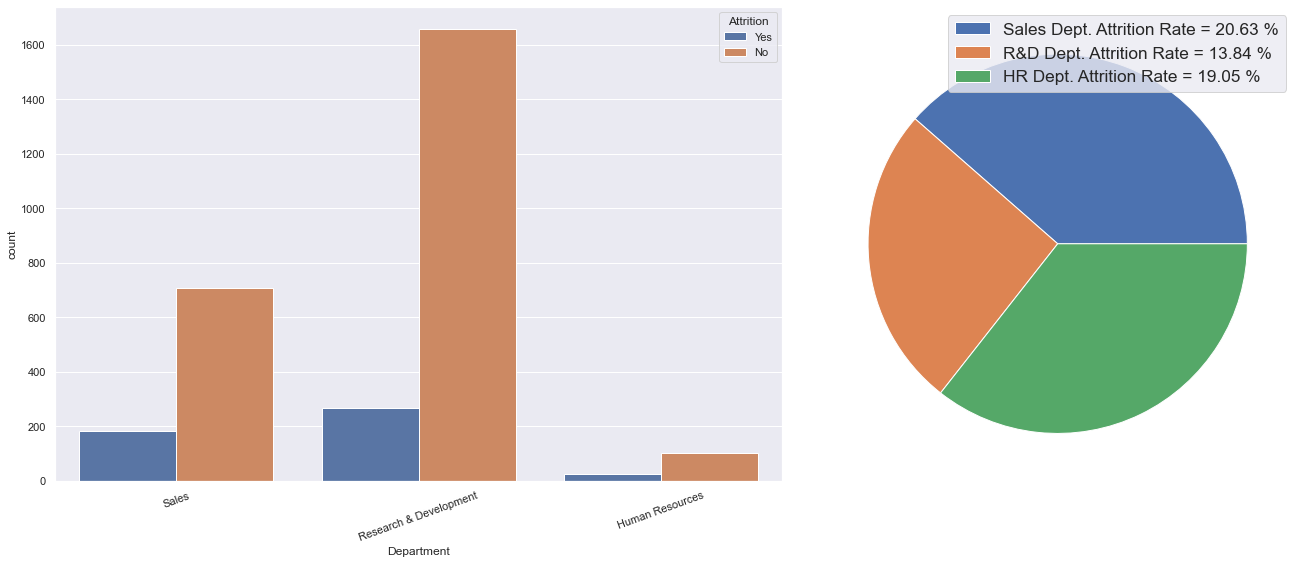

In [42]:
# Observing relation betweeen 'Department' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['Department'], hue = hr['Attrition'])
plt.xticks(rotation = 20)
plt.tight_layout()
sales_att_rate = round(len(hr[(hr['Department'] == 'Sales') & (hr['Attrition'] == 'Yes')])/len(hr[hr['Department'] == 'Sales'])*100,2)
print('Sales dept. employees attrition rate = ',sales_att_rate,'%')

rd_att_rate = round(len(hr[(hr['Department'] == 'Research & Development') & (hr['Attrition'] == 'Yes')])/len(hr[hr['Department'] == 'Research & Development'])*100,2)
print('R&D dept. employees attrition rate = ',rd_att_rate,'%')

hr_att_rate = round(len(hr[(hr['Department'] == 'Human Resources') & (hr['Attrition'] == 'Yes')])/len(hr[hr['Department'] == 'Human Resources'])*100,2)
print('HR dept. employees attrition rate = ',hr_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [sales_att_rate, rd_att_rate, hr_att_rate])
plt.legend(fontsize = 'x-large', labels = [f'Sales Dept. Attrition Rate = {sales_att_rate} %', f'R&D Dept. Attrition Rate = {rd_att_rate} %',f'HR Dept. Attrition Rate = {hr_att_rate} %'], loc = 'best')
plt.tight_layout()
plt.show()

- We can observe that Sales Department employees have higher Attrition Rate

Attrition rate of employees having education level as 1 =  18.24 %
Attrition rate of employees having education level as 2 =  15.6 %
Attrition rate of employees having education level as 3 =  17.31 %
Attrition rate of employees having education level as 4 =  14.57 %
Attrition rate of employees having education level as 5 =  10.42 %


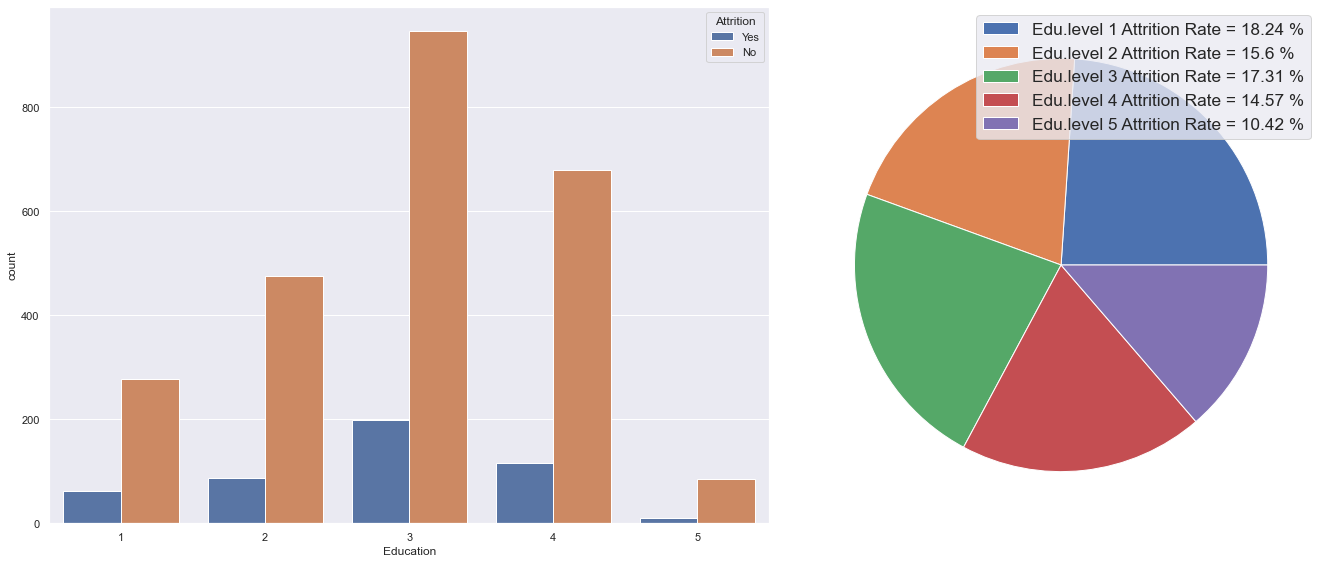

In [43]:
# Observing relation betweeen 'Education' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['Education'], hue = hr['Attrition'])
plt.tight_layout()

edu1_att_rate = round(len(hr[(hr['Education'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['Education'] == 1])*100,2)
print('Attrition rate of employees having education level as 1 = ',edu1_att_rate,'%')

edu2_att_rate = round(len(hr[(hr['Education'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['Education'] == 2])*100,2)
print('Attrition rate of employees having education level as 2 = ',edu2_att_rate,'%')

edu3_att_rate = round(len(hr[(hr['Education'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['Education'] == 3])*100,2)
print('Attrition rate of employees having education level as 3 = ',edu3_att_rate,'%')

edu4_att_rate = round(len(hr[(hr['Education'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['Education'] == 4])*100,2)
print('Attrition rate of employees having education level as 4 = ',edu4_att_rate,'%')

edu5_att_rate = round(len(hr[(hr['Education'] == 5) & (hr['Attrition'] == 'Yes')])/len(hr[hr['Education'] == 5])*100,2)
print('Attrition rate of employees having education level as 5 = ',edu5_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [edu1_att_rate, edu2_att_rate, edu3_att_rate, edu4_att_rate, edu5_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Edu.level 1 Attrition Rate = {edu1_att_rate} %', f'Edu.level 2 Attrition Rate = {edu2_att_rate} %',f'Edu.level 3 Attrition Rate = {edu3_att_rate} %', f'Edu.level 4 Attrition Rate = {edu4_att_rate} %', f'Edu.level 5 Attrition Rate = {edu5_att_rate} %'])
plt.tight_layout()
plt.show()

- We can observe that employees having lower education level (1,2,3) are having more Attrition Rate

Attrition Rate of Employees in LifeSciences EducationField =  14.69 %
Attrition Rate of Employees in Medical EducationField =  13.58 %
Attrition Rate of Employees in Marketing EducationField =  22.01 %
Attrition Rate of Employees in Technical Degree EducationField =  24.24 %
Attrition Rate of Employees in Human Resources EducationField =  25.93 %
Attrition Rate of Employees in some Other EducationField =  13.41 %


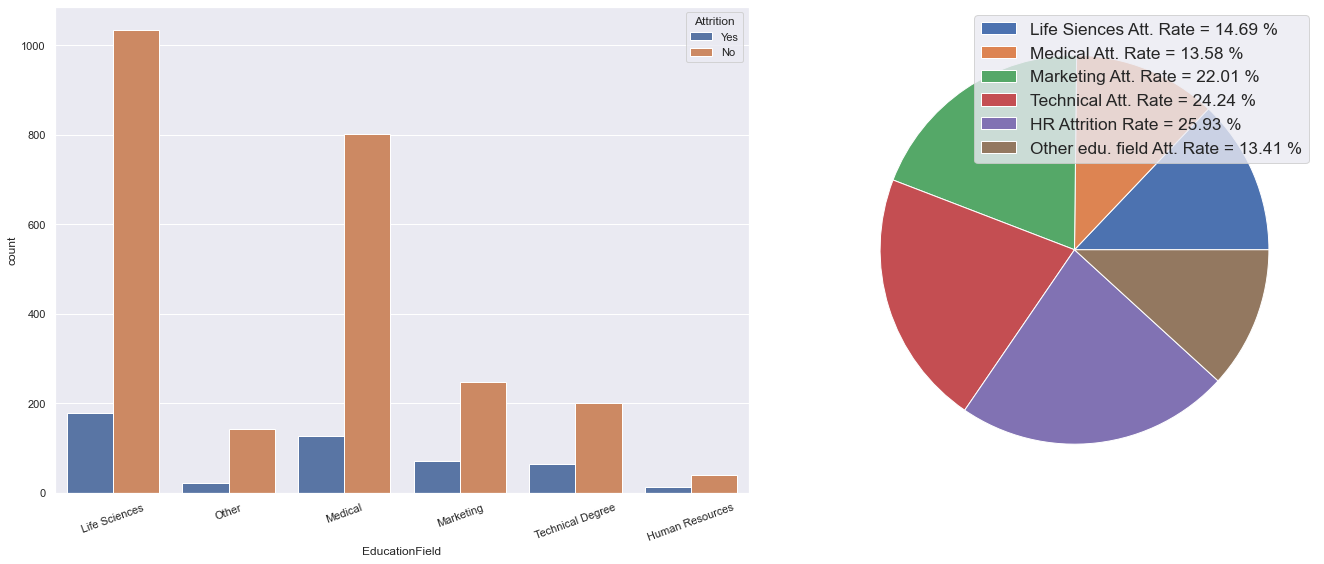

In [44]:
# Observing relation between 'EducationField' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['EducationField'], hue = hr['Attrition'])
plt.xticks(rotation = 20)

lifescience_att_rate = round(len(hr[(hr['EducationField'] == 'Life Sciences') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Life Sciences'])*100,2)
print('Attrition Rate of Employees in LifeSciences EducationField = ',lifescience_att_rate,'%')

medical_att_rate = round(len(hr[(hr['EducationField'] == 'Medical') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Medical'])*100,2)
print('Attrition Rate of Employees in Medical EducationField = ',medical_att_rate,'%')

marketing_att_rate = round(len(hr[(hr['EducationField'] == 'Marketing') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Marketing'])*100,2)
print('Attrition Rate of Employees in Marketing EducationField = ',marketing_att_rate,'%')

technical_att_rate = round(len(hr[(hr['EducationField'] == 'Technical Degree') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Technical Degree'])*100,2)
print('Attrition Rate of Employees in Technical Degree EducationField = ',technical_att_rate,'%')

hr_att_rate = round(len(hr[(hr['EducationField'] == 'Human Resources') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Human Resources'])*100,2)
print('Attrition Rate of Employees in Human Resources EducationField = ',hr_att_rate,'%')

other_att_rate = round(len(hr[(hr['EducationField'] == 'Other') & (hr['Attrition'] == 'Yes')])/len(hr[hr['EducationField'] == 'Other'])*100,2)
print('Attrition Rate of Employees in some Other EducationField = ',other_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [lifescience_att_rate, medical_att_rate, marketing_att_rate, technical_att_rate, hr_att_rate, other_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Life Siences Att. Rate = {lifescience_att_rate} %',f'Medical Att. Rate = {medical_att_rate} %',f'Marketing Att. Rate = {marketing_att_rate} %',f'Technical Att. Rate = {technical_att_rate} %',f'HR Attrition Rate = {hr_att_rate} %', f'Other edu. field Att. Rate = {other_att_rate} %'])
plt.tight_layout()
plt.show()

- Employees having education field in HR are having Highest Attrition Rate followed by Technical Department and then Marketing Dept.

In [45]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

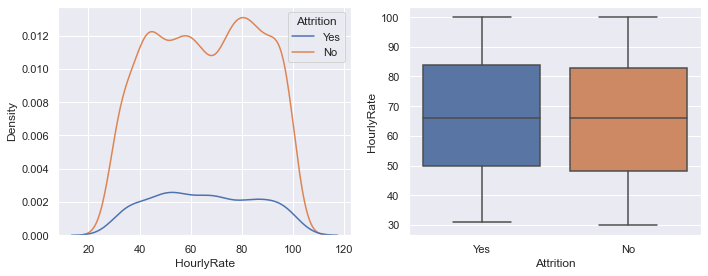

In [46]:
# Observing realtion between 'HourlyRate' and 'Attrition'
bivariate_plot('HourlyRate','Attrition')

- We can't observe much effect or difference of Attrition Rate by HourlyRate.

Employees whose Job Involvement Rating is 1 are having Attrition Rate =  33.73 %
Employees whose Job Involvement Rating is 2 are having Attrition Rate =  18.93 %
Employees whose Job Involvement Rating is 3 are having Attrition Rate =  14.4 %
Employees whose Job Involvement Rating is 4 are having Attrition Rate =  14.4 %


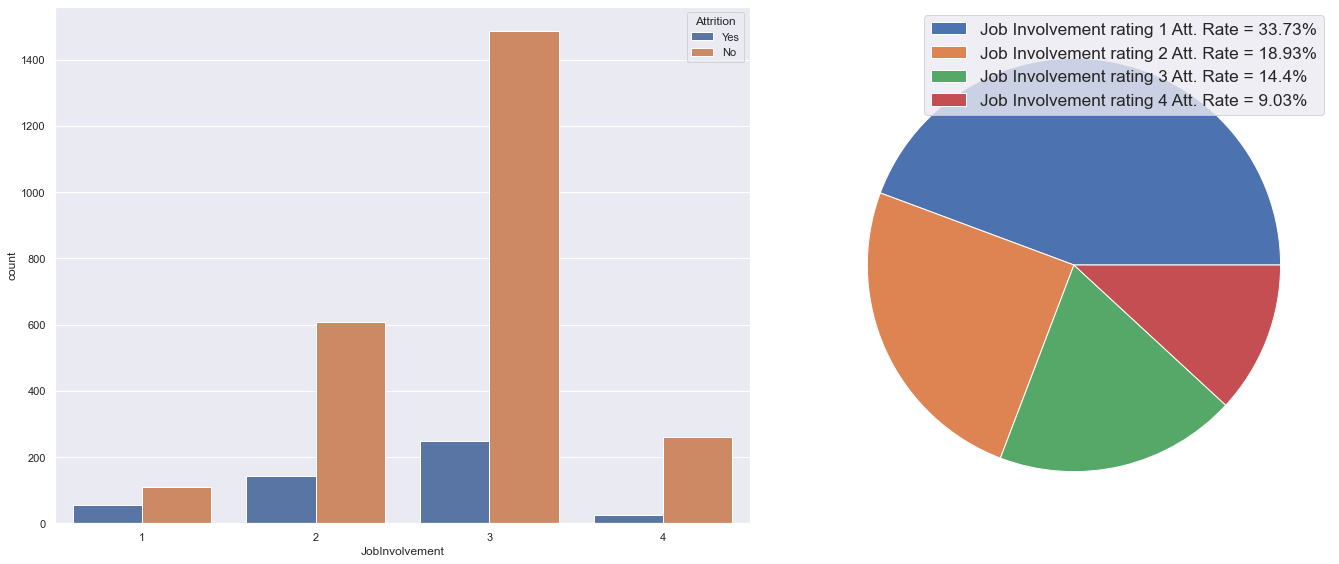

In [47]:
# Observing relation between 'JobInvolvement' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['JobInvolvement'], hue = hr['Attrition'])

ji1_att_rate = round((len(hr[(hr['JobInvolvement'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobInvolvement'] == 1]))*100,2)
print('Employees whose Job Involvement Rating is 1 are having Attrition Rate = ',ji1_att_rate,'%')

ji2_att_rate = round((len(hr[(hr['JobInvolvement'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobInvolvement'] == 2]))*100,2)
print('Employees whose Job Involvement Rating is 2 are having Attrition Rate = ',ji2_att_rate,'%')

ji3_att_rate = round((len(hr[(hr['JobInvolvement'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobInvolvement'] == 3]))*100,2)
print('Employees whose Job Involvement Rating is 3 are having Attrition Rate = ',ji3_att_rate,'%')

ji4_att_rate = round((len(hr[(hr['JobInvolvement'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobInvolvement'] == 4]))*100,2)
print('Employees whose Job Involvement Rating is 4 are having Attrition Rate = ',ji3_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [ji1_att_rate, ji2_att_rate, ji3_att_rate, ji4_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Job Involvement rating 1 Att. Rate = {ji1_att_rate}%',f'Job Involvement rating 2 Att. Rate = {ji2_att_rate}%',f'Job Involvement rating 3 Att. Rate = {ji3_att_rate}%',f'Job Involvement rating 4 Att. Rate = {ji4_att_rate}%'])
plt.tight_layout()
plt.show()

- We can clearly observe that employees having lower job involvement ratings (1,2) have higher Attrition Rates.

Employees whose Job Level Rating is 1 are having Attrition Rate =  26.34 %
Employees whose Job Level Rating is 2 are having Attrition Rate =  9.74 %
Employees whose Job Level Rating is 3 are having Attrition Rate =  14.68 %
Employees whose Job Level Rating is 4 are having Attrition Rate =  4.72 %
Employees whose Job Level Rating is 5 are having Attrition Rate =  7.25 %


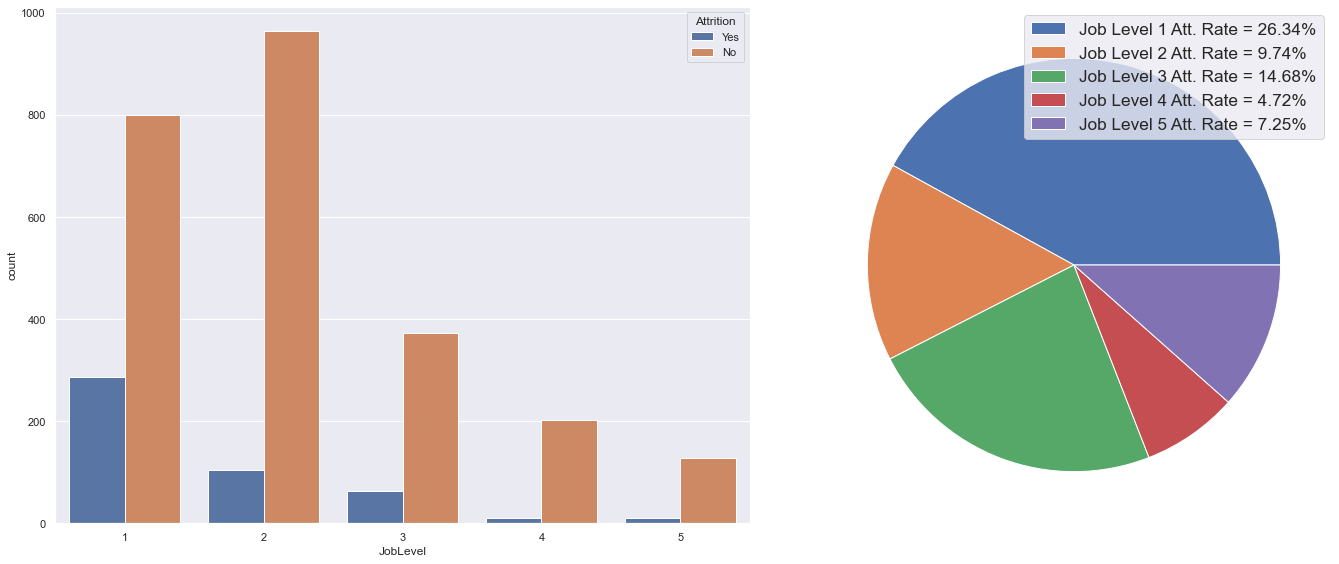

In [48]:
# Observing relation between 'JobLevel' and 'Attrition'
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['JobLevel'], hue = hr['Attrition'])

jl1_att_rate = round((len(hr[(hr['JobLevel'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobLevel'] == 1]))*100,2)
print('Employees whose Job Level Rating is 1 are having Attrition Rate = ',jl1_att_rate,'%')

jl2_att_rate = round((len(hr[(hr['JobLevel'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobLevel'] == 2]))*100,2)
print('Employees whose Job Level Rating is 2 are having Attrition Rate = ',jl2_att_rate,'%')

jl3_att_rate = round((len(hr[(hr['JobLevel'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobLevel'] == 3]))*100,2)
print('Employees whose Job Level Rating is 3 are having Attrition Rate = ',jl3_att_rate,'%')

jl4_att_rate = round((len(hr[(hr['JobLevel'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobLevel'] == 4]))*100,2)
print('Employees whose Job Level Rating is 4 are having Attrition Rate = ',jl4_att_rate,'%')

jl5_att_rate = round((len(hr[(hr['JobLevel'] == 5) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobLevel'] == 5]))*100,2)
print('Employees whose Job Level Rating is 5 are having Attrition Rate = ',jl5_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [jl1_att_rate, jl2_att_rate, jl3_att_rate, jl4_att_rate, jl5_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Job Level 1 Att. Rate = {jl1_att_rate}%',f'Job Level 2 Att. Rate = {jl2_att_rate}%',f'Job Level 3 Att. Rate = {jl3_att_rate}%',f'Job Level 4 Att. Rate = {jl4_att_rate}%',f'Job Level 5 Att. Rate = {jl5_att_rate}%'])
plt.tight_layout()
plt.show()

Employees belonging to Job Level 1 & 3 contibute to highest Attrition Rate in the company.

Att. Rate of Sales Executive Emp. =  17.48 %
Att. Rate of Research Scientist Emp. =  16.1 %
Att. Rate of Laboratory Technician Emp. =  23.94 %
Att. Rate of Manufacturing Director Emp. =  6.9 %
Att. Rate of Healthcare Representative Emp. =  6.87 %
Att. Rate of Manager Emp. =  4.9 %
Att. Rate of Sales Rep. Emp. =  39.76 %
Att. Rate of Research Director Emp. =  2.5 %
Att. Rate of Human Resources =  23.08 %


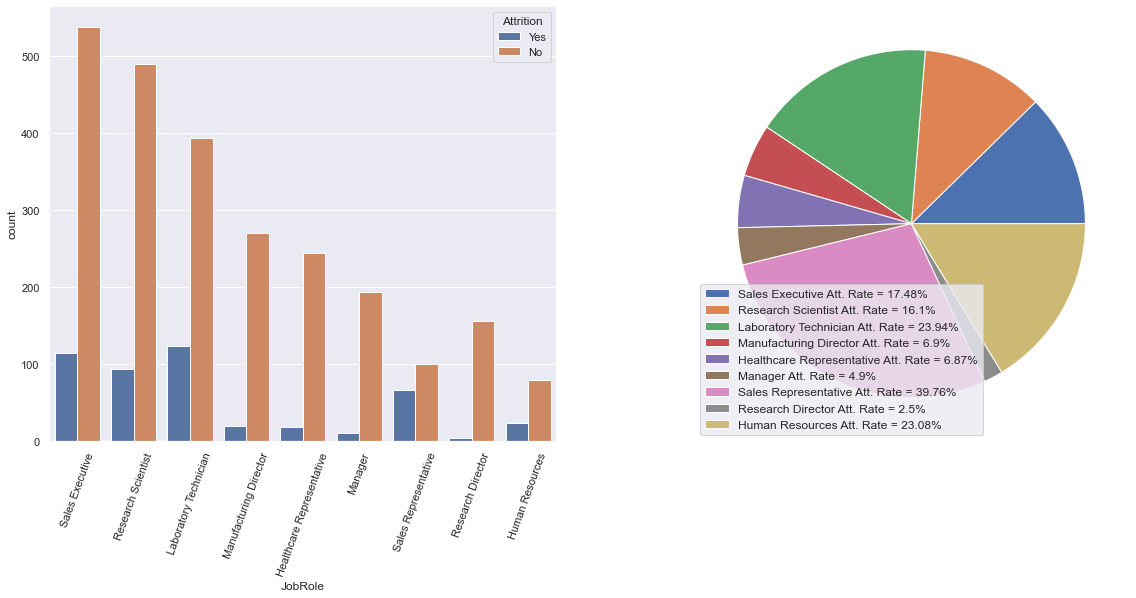

In [49]:
# Observing relation between relation between 'JobRole' and 'Attrition'
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['JobRole'], hue = hr['Attrition'])
plt.xticks(rotation = 70)

se_att_rate = round((len(hr[(hr['JobRole'] == 'Sales Executive') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Sales Executive']))*100,2)
print('Att. Rate of Sales Executive Emp. = ',se_att_rate,'%')

rs_att_rate = round((len(hr[(hr['JobRole'] == 'Research Scientist') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Research Scientist']))*100,2)
print('Att. Rate of Research Scientist Emp. = ',rs_att_rate,'%')

lt_att_rate = round((len(hr[(hr['JobRole'] == 'Laboratory Technician') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Laboratory Technician']))*100,2)
print('Att. Rate of Laboratory Technician Emp. = ',lt_att_rate,'%')

md_att_rate = round((len(hr[(hr['JobRole'] == 'Manufacturing Director') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Manufacturing Director']))*100,2)
print('Att. Rate of Manufacturing Director Emp. = ',md_att_rate,'%')

hlr_att_rate = round((len(hr[(hr['JobRole'] == 'Healthcare Representative') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Healthcare Representative']))*100,2)
print('Att. Rate of Healthcare Representative Emp. = ',hlr_att_rate,'%')

mgr_att_rate = round((len(hr[(hr['JobRole'] == 'Manager') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Manager']))*100,2)
print('Att. Rate of Manager Emp. = ',mgr_att_rate,'%')

slr_att_rate = round((len(hr[(hr['JobRole'] == 'Sales Representative') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Sales Representative']))*100,2)
print('Att. Rate of Sales Rep. Emp. = ',slr_att_rate,'%')

rd_att_rate = round((len(hr[(hr['JobRole'] == 'Research Director') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Research Director']))*100,2)
print('Att. Rate of Research Director Emp. = ',rd_att_rate,'%')

hr_att_rate = round((len(hr[(hr['JobRole'] == 'Human Resources') & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobRole'] == 'Human Resources']))*100,2)
print('Att. Rate of Human Resources = ',hr_att_rate,'%')


plt.subplot(1,2,2)
plt.pie(x = [se_att_rate, rs_att_rate, lt_att_rate, md_att_rate, hlr_att_rate, mgr_att_rate, slr_att_rate, rd_att_rate, hr_att_rate])
plt.legend(fontsize = 'medium',loc = 'best', labels = [f'Sales Executive Att. Rate = {se_att_rate}%',f'Research Scientist Att. Rate = {rs_att_rate}%',
f'Laboratory Technician Att. Rate = {lt_att_rate}%',f'Manufacturing Director Att. Rate = {md_att_rate}%',
f'Healthcare Representative Att. Rate = {hlr_att_rate}%',f'Manager Att. Rate = {mgr_att_rate}%',
f'Sales Representative Att. Rate = {slr_att_rate}%',f'Research Director Att. Rate = {rd_att_rate}%',
f'Human Resources Att. Rate = {hr_att_rate}%'])
plt.show()

- We can observe highest Attrition Rate for 'Sales Representative' followed by 'Laboratory Tehnician' job role.

Employees whose Job Satisfaction Rating is 1 are having Attrition Rate =  22.84 %
Employees whose Job Satisfaction Rating is 2 are having Attrition Rate =  16.43 %
Employees whose Job Satisfaction Rating is 3 are having Attrition Rate =  16.52 %
Employees whose Job Satisfaction Rating is 4 are having Attrition Rate =  11.33 %


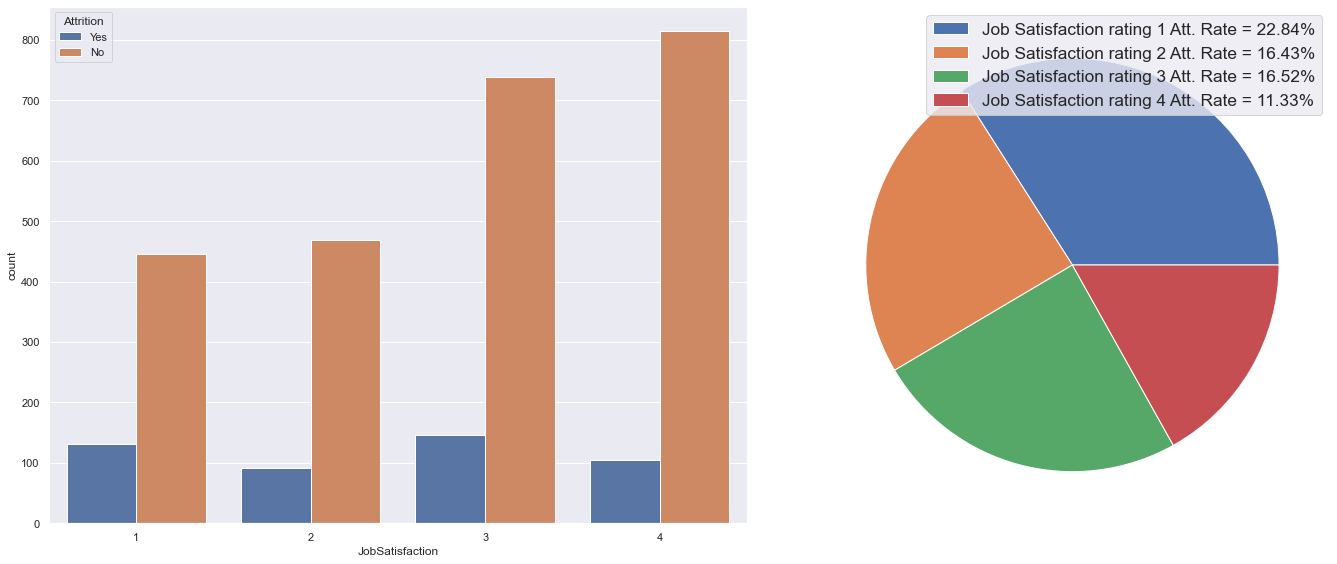

In [50]:
# Observing relation between 'JobSatisfaction' and 'Attrition'

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['JobSatisfaction'], hue = hr['Attrition'])

js1_att_rate = round((len(hr[(hr['JobSatisfaction'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobSatisfaction'] == 1]))*100,2)
print('Employees whose Job Satisfaction Rating is 1 are having Attrition Rate = ',js1_att_rate,'%')

js2_att_rate = round((len(hr[(hr['JobSatisfaction'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobSatisfaction'] == 2]))*100,2)
print('Employees whose Job Satisfaction Rating is 2 are having Attrition Rate = ',js2_att_rate,'%')

js3_att_rate = round((len(hr[(hr['JobSatisfaction'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobSatisfaction'] == 3]))*100,2)
print('Employees whose Job Satisfaction Rating is 3 are having Attrition Rate = ',js3_att_rate,'%')

js4_att_rate = round((len(hr[(hr['JobSatisfaction'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['JobSatisfaction'] == 4]))*100,2)
print('Employees whose Job Satisfaction Rating is 4 are having Attrition Rate = ',js4_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [js1_att_rate, js2_att_rate, js3_att_rate, js4_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Job Satisfaction rating 1 Att. Rate = {js1_att_rate}%',f'Job Satisfaction rating 2 Att. Rate = {js2_att_rate}%',f'Job Satisfaction rating 3 Att. Rate = {js3_att_rate}%',f'Job Satisfaction rating 4 Att. Rate = {js4_att_rate}%'])
plt.tight_layout()
plt.show()

- It's clearly evident that employees having job satisfaction rating as 1 have highest attrition

Single Emp. Att. Rate =  25.53 %
Married Emp. Att. Rate =  12.48 %
Divorced Emp. Att. Rate =  10.09 %


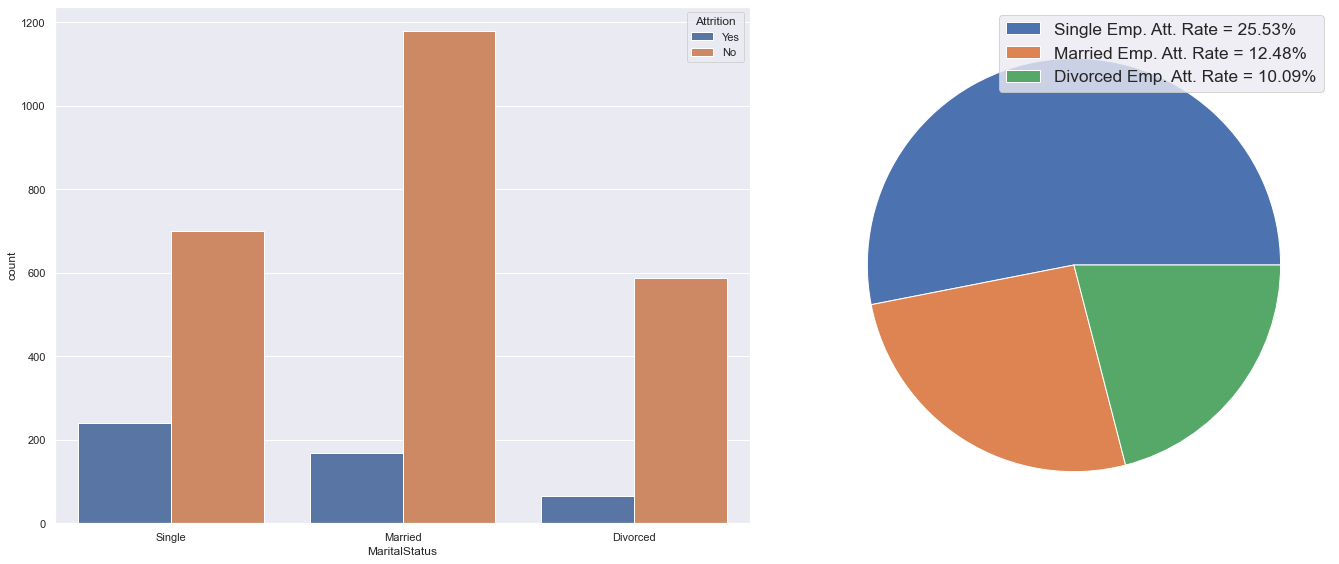

In [51]:
# Observing relation between 'MaritalStatus' and 'Attrition'
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['MaritalStatus'], hue = hr['Attrition'])

single_att_rate = round((len(hr[(hr['MaritalStatus'] == 'Single') & (hr['Attrition'] == 'Yes')])/len(hr[hr['MaritalStatus'] == 'Single']))*100,2)
print('Single Emp. Att. Rate = ',single_att_rate,'%')

married_att_rate = round((len(hr[(hr['MaritalStatus'] == 'Married') & (hr['Attrition'] == 'Yes')])/len(hr[hr['MaritalStatus'] == 'Married']))*100,2)
print('Married Emp. Att. Rate = ',married_att_rate,'%')

divorced_att_rate = round((len(hr[(hr['MaritalStatus'] == 'Divorced') & (hr['Attrition'] == 'Yes')])/len(hr[hr['MaritalStatus'] == 'Divorced']))*100,2)
print('Divorced Emp. Att. Rate = ',divorced_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [single_att_rate, married_att_rate, divorced_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Single Emp. Att. Rate = {single_att_rate}%',f'Married Emp. Att. Rate = {married_att_rate}%',f'Divorced Emp. Att. Rate = {divorced_att_rate}%'])
plt.tight_layout()
plt.show()

- So, 'Single' employees attrition rate is more as compared to the 'Married' and  least among 'Divorced' employees

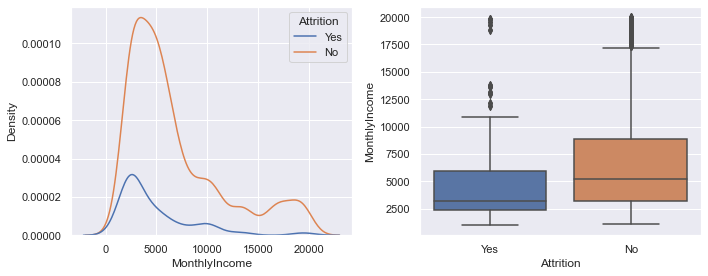

In [52]:
# Observing relation between 'MonthlyIncome' and 'Attrition'
bivariate_plot('MonthlyIncome','Attrition')

- We can observe that employees having lower range of monthly income have higher Attrition Rate.

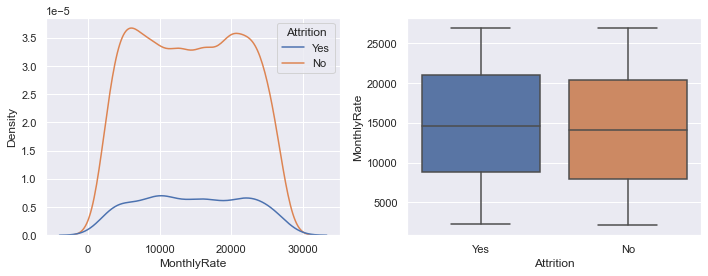

In [53]:
# Observing relation between 'MonthlyRate' and 'Attrition'
bivariate_plot('MonthlyRate','Attrition')

- We can't observe clear distinction between Monthly Rate and Attrition Rate of employees.

Att. Rate of employees who worked for 0 company =  11.68 %
Att. Rate of employees who worked for 1 company =  18.81 %
Att. Rate of employees who worked for 2 companies =  10.96 %
Att. Rate of employees who worked for 3 companies =  10.06 %
Att. Rate of employees who worked for 4 companies =  12.23 %
Att. Rate of employees who worked for 5 companies =  25.4 %
Att. Rate of employees who worked for 6 companies =  22.86 %
Att. Rate of employees who worked for 7 companies =  22.97 %
Att. Rate of employees who worked for 8 companies =  12.24 %
Att. Rate of employees who worked for 9 companies =  23.08 %


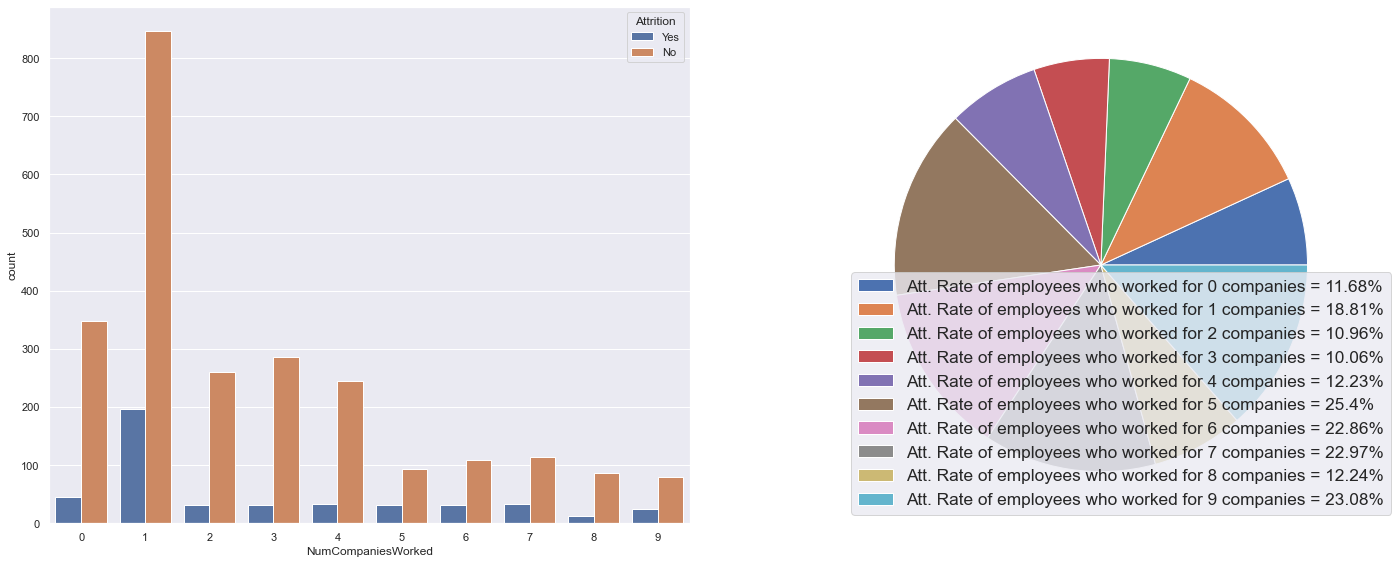

In [54]:
# Observing relation between 'NumCompaniesWorked' and 'Attrition'

sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['NumCompaniesWorked'], hue = hr['Attrition'])

nc0_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 0) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 0]))*100,2)
print('Att. Rate of employees who worked for 0 company = ',nc0_att_rate,'%')

nc1_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 1]))*100,2)
print('Att. Rate of employees who worked for 1 company = ',nc1_att_rate,'%')

nc2_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 2]))*100,2)
print('Att. Rate of employees who worked for 2 companies = ',nc2_att_rate,'%')

nc3_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 3]))*100,2)
print('Att. Rate of employees who worked for 3 companies = ',nc3_att_rate,'%')

nc4_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 4]))*100,2)
print('Att. Rate of employees who worked for 4 companies = ',nc4_att_rate,'%')

nc5_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 5) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 5]))*100,2)
print('Att. Rate of employees who worked for 5 companies = ',nc5_att_rate,'%')

nc6_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 6) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 6]))*100,2)
print('Att. Rate of employees who worked for 6 companies = ',nc6_att_rate,'%')

nc7_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 7) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 7]))*100,2)
print('Att. Rate of employees who worked for 7 companies = ',nc7_att_rate,'%')

nc8_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 8) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 8]))*100,2)
print('Att. Rate of employees who worked for 8 companies = ',nc8_att_rate,'%')

nc9_att_rate = round((len(hr[(hr['NumCompaniesWorked'] == 9) & (hr['Attrition'] == 'Yes')])/len(hr[hr["NumCompaniesWorked"] == 9]))*100,2)
print('Att. Rate of employees who worked for 9 companies = ',nc9_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [nc0_att_rate, nc1_att_rate, nc2_att_rate, nc3_att_rate, nc4_att_rate, nc5_att_rate, nc6_att_rate, nc7_att_rate, nc8_att_rate, nc9_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Att. Rate of employees who worked for 0 companies = {nc0_att_rate}%',f'Att. Rate of employees who worked for 1 companies = {nc1_att_rate}%', f'Att. Rate of employees who worked for 2 companies = {nc2_att_rate}%',f'Att. Rate of employees who worked for 3 companies = {nc3_att_rate}%',f'Att. Rate of employees who worked for 4 companies = {nc4_att_rate}%',f'Att. Rate of employees who worked for 5 companies = {nc5_att_rate}%',f'Att. Rate of employees who worked for 6 companies = {nc6_att_rate}%',f'Att. Rate of employees who worked for 7 companies = {nc7_att_rate}%',f'Att. Rate of employees who worked for 8 companies = {nc8_att_rate}%',f'Att. Rate of employees who worked for 9 companies = {nc9_att_rate}%'])
plt.tight_layout()
plt.show()

- It's clearly evident that employees who have worked for  large no. of companies (5-9) have different attrition rate.

Att. Rate of employees who did Overtime =  30.53 %
Att. Rate of employees who didn't do Overtime =  10.44 %


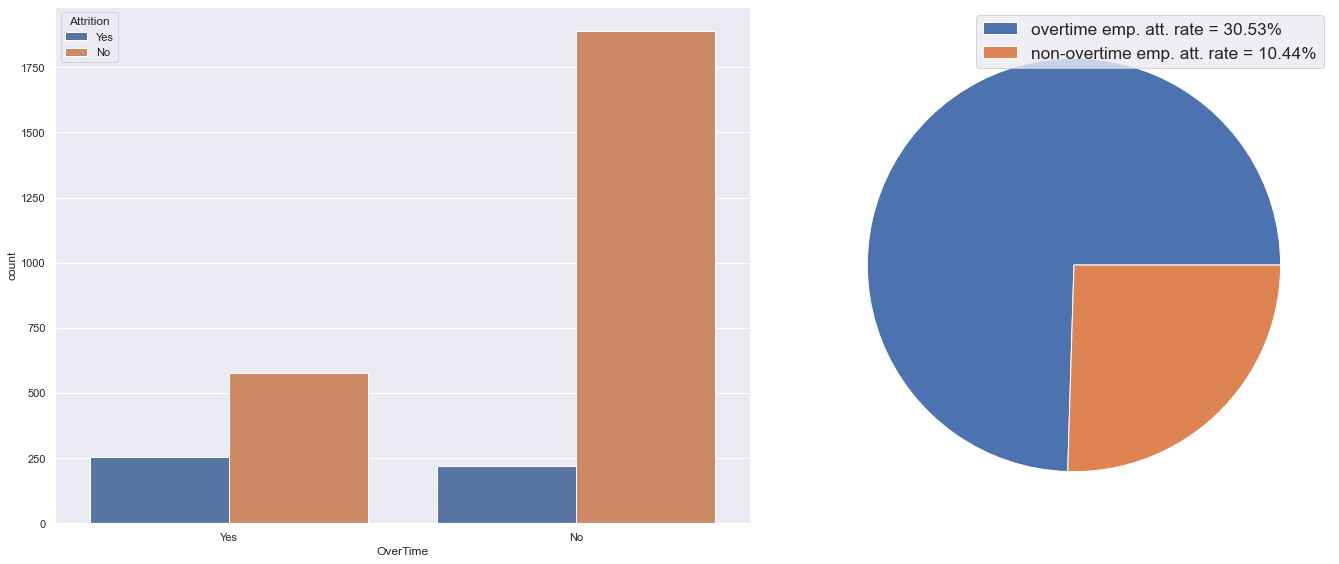

In [55]:
# Observing relation between 'OverTime' and 'Attrition'

sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['OverTime'], hue = hr['Attrition'])

overtime_att_rate = round((len(hr[(hr['OverTime'] == 'Yes') & (hr['Attrition'] == 'Yes')])/len(hr[hr['OverTime'] == 'Yes']))*100,2)
print('Att. Rate of employees who did Overtime = ',overtime_att_rate,'%')

non_overtime_att_rate = round((len(hr[(hr['OverTime'] == 'No') & (hr['Attrition'] == 'Yes')])/len(hr[hr['OverTime'] == 'No']))*100,2)
print('Att. Rate of employees who didn\'t do Overtime = ',non_overtime_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [overtime_att_rate, non_overtime_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'overtime emp. att. rate = {overtime_att_rate}%', f'non-overtime emp. att. rate = {non_overtime_att_rate}%'])
plt.tight_layout()
plt.show()

- We can observe employees who did overtime for the company have higher Attrition Rate.

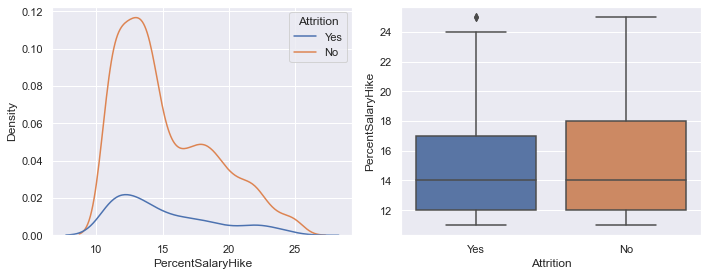

In [56]:
# Observing 'PercentSalaryHike' and 'Attrition'
bivariate_plot('PercentSalaryHike','Attrition')

- We can observe higher Attrition Rate for lower range of 'PercentSalaryHike' employees.

Att. Rate of employees who had performance rating as 3 =  16.08 %
Att. Rate of employees who had performance rating as 4 =  16.37 %


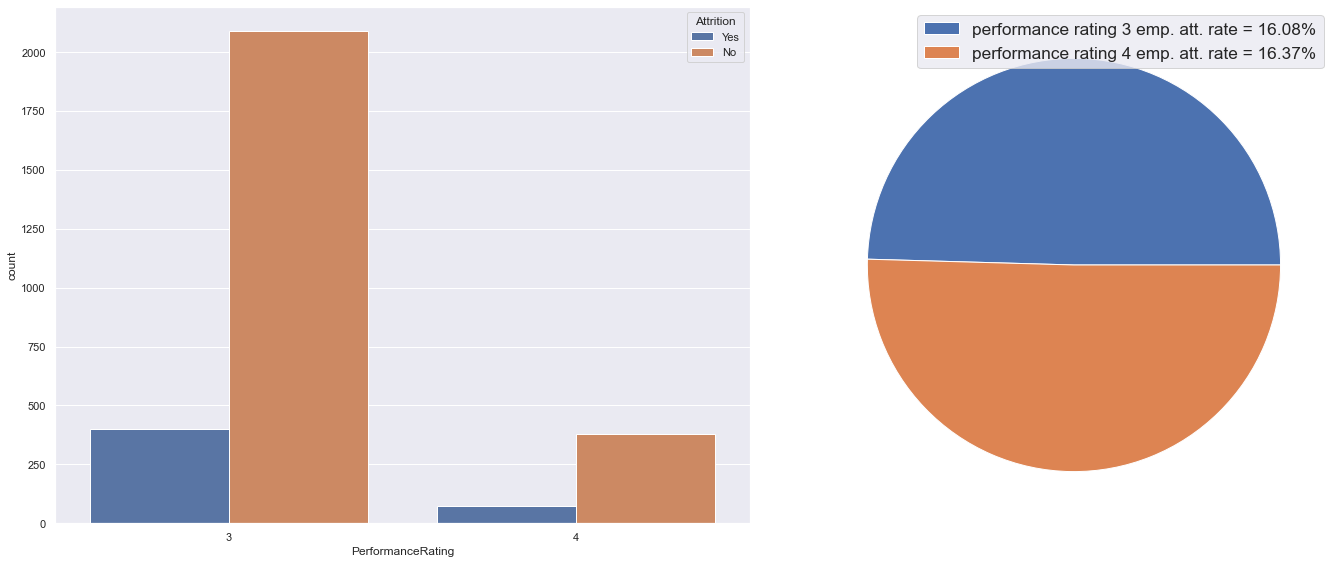

In [57]:
# Observing relation between 'PerformanceRating' and 'Attrition'

sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['PerformanceRating'], hue = hr['Attrition'])

pr3_att_rate = round((len(hr[(hr['PerformanceRating'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['PerformanceRating'] == 3]))*100,2)
print('Att. Rate of employees who had performance rating as 3 = ',pr3_att_rate,'%')

pr4_att_rate = round((len(hr[(hr['PerformanceRating'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['PerformanceRating'] == 4]))*100,2)
print('Att. Rate of employees who had performance rating as 4 = ',pr4_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [pr3_att_rate, pr4_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'performance rating 3 emp. att. rate = {pr3_att_rate}%', f'performance rating 4 emp. att. rate = {pr4_att_rate}%'])
plt.tight_layout()
plt.show()

- There isn't significant inference we get on Attrition Rate based on Performance Rating.

Employees whose Relationship Satisfaction Rating is 1 are having Attrition Rate =  20.65 %
Employees whose Relationship Satisfaction Rating is 2 are having Attrition Rate =  14.85 %
Employees whose Relationship Satisfaction Rating is 3 are having Attrition Rate =  15.47 %
Employees whose Relationship Satisfaction Rating is 4 are having Attrition Rate =  14.81 %


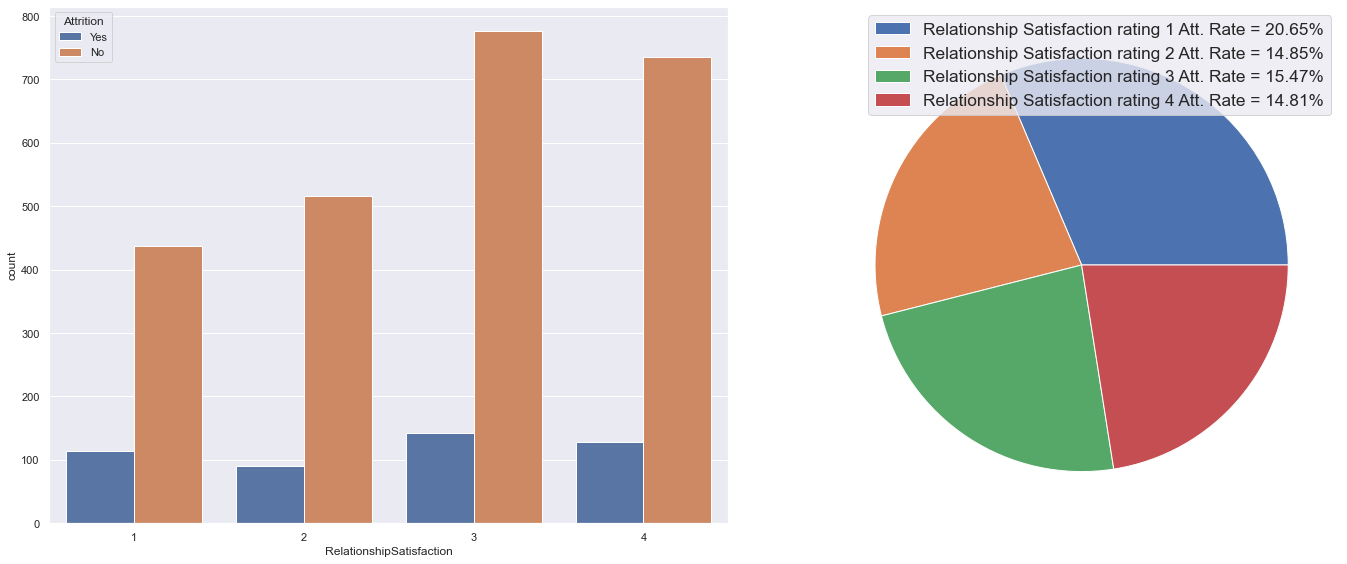

In [58]:
# Observing relation between 'RelationshipSatisfaction' and 'Attrition'

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['RelationshipSatisfaction'], hue = hr['Attrition'])

rs1_att_rate = round((len(hr[(hr['RelationshipSatisfaction'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['RelationshipSatisfaction'] == 1]))*100,2)
print('Employees whose Relationship Satisfaction Rating is 1 are having Attrition Rate = ',rs1_att_rate,'%')

rs2_att_rate = round((len(hr[(hr['RelationshipSatisfaction'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['RelationshipSatisfaction'] == 2]))*100,2)
print('Employees whose Relationship Satisfaction Rating is 2 are having Attrition Rate = ',rs2_att_rate,'%')

rs3_att_rate = round((len(hr[(hr['RelationshipSatisfaction'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['RelationshipSatisfaction'] == 3]))*100,2)
print('Employees whose Relationship Satisfaction Rating is 3 are having Attrition Rate = ',rs3_att_rate,'%')

rs4_att_rate = round((len(hr[(hr['RelationshipSatisfaction'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['RelationshipSatisfaction'] == 4]))*100,2)
print('Employees whose Relationship Satisfaction Rating is 4 are having Attrition Rate = ',rs4_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [rs1_att_rate, rs2_att_rate, rs3_att_rate, rs4_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'Relationship Satisfaction rating 1 Att. Rate = {rs1_att_rate}%',f'Relationship Satisfaction rating 2 Att. Rate = {rs2_att_rate}%',f'Relationship Satisfaction rating 3 Att. Rate = {rs3_att_rate}%',f'Relationship Satisfaction rating 4 Att. Rate = {rs4_att_rate}%'])
plt.tight_layout()
plt.show()

- We can clearly see that poor relationship with Manager tends to higher Attrition Rate.

Employees whose StockOptionLevel is 0 are having Attrition Rate =  24.41 %
Employees whose StockOptionLevel is 1 are having Attrition Rate =  9.4 %
Employees whose StockOptionLevel is 2 are having Attrition Rate =  7.59 %
Employees whose StockOptionLevel is 3 are having Attrition Rate =  17.65 %


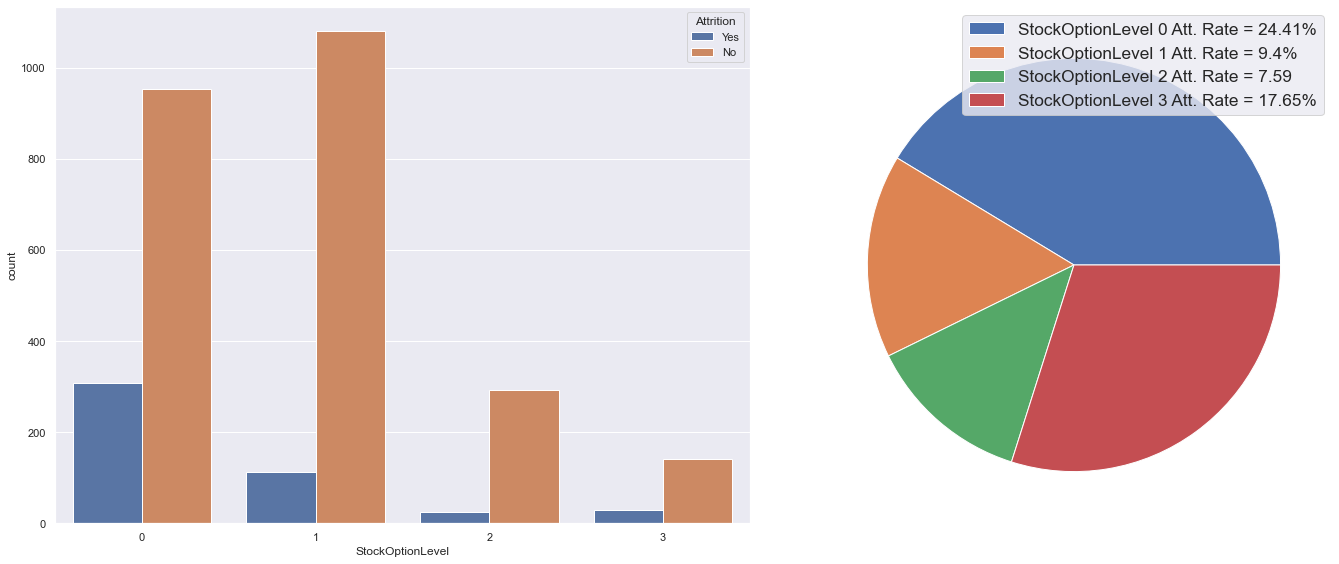

In [59]:
# Observing relation between 'StockOptionLevel' and 'Attrition'

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['StockOptionLevel'], hue = hr['Attrition'])

sl0_att_rate = round((len(hr[(hr['StockOptionLevel'] == 0) & (hr['Attrition'] == 'Yes')])/len(hr[hr['StockOptionLevel'] == 0]))*100,2)
print('Employees whose StockOptionLevel is 0 are having Attrition Rate = ',sl0_att_rate,'%')

sl1_att_rate = round((len(hr[(hr['StockOptionLevel'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['StockOptionLevel'] == 1]))*100,2)
print('Employees whose StockOptionLevel is 1 are having Attrition Rate = ',sl1_att_rate,'%')

sl2_att_rate = round((len(hr[(hr['StockOptionLevel'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['StockOptionLevel'] == 2]))*100,2)
print('Employees whose StockOptionLevel is 2 are having Attrition Rate = ',sl2_att_rate,'%')

sl3_att_rate = round((len(hr[(hr['StockOptionLevel'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['StockOptionLevel'] == 3]))*100,2)
print('Employees whose StockOptionLevel is 3 are having Attrition Rate = ',sl3_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [sl0_att_rate, sl1_att_rate, sl2_att_rate, sl3_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'StockOptionLevel 0 Att. Rate = {sl0_att_rate}%',f'StockOptionLevel 1 Att. Rate = {sl1_att_rate}%',f'StockOptionLevel 2 Att. Rate = {sl2_att_rate}',f'StockOptionLevel 3 Att. Rate = {sl3_att_rate}%'])
plt.tight_layout()
plt.show()

- Employees having stock option level 0 are having highest Attrition Rate.

Employees whose WorkLifeBalance rating is 1 are having Attrition Rate =  31.25 %
Employees whose WorkLifeBalance rating is 2 are having Attrition Rate =  16.86 %
Employees whose WorkLifeBalance rating is 3 are having Attrition Rate =  14.22 %
Employees whose WorkLifeBalance rating is 4 are having Attrition Rate =  17.65 %


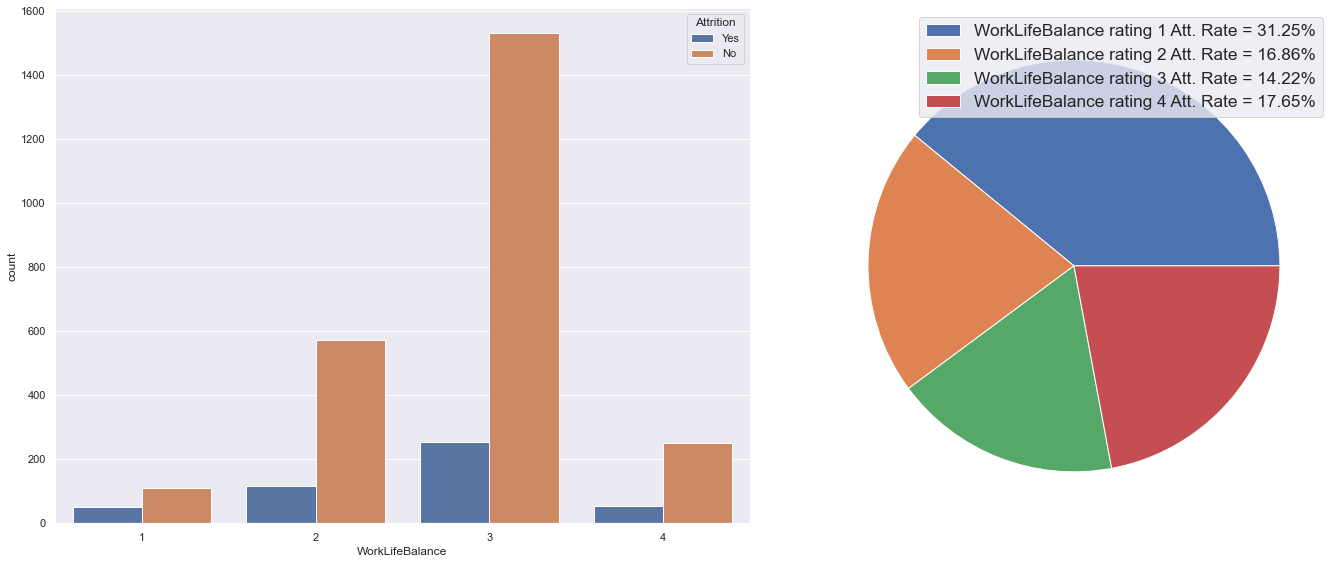

In [61]:
# Observing relation between 'WorkLifeBalance' and 'Attrition'

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x = hr['WorkLifeBalance'], hue = hr['Attrition'])

wlb1_att_rate = round((len(hr[(hr['WorkLifeBalance'] == 1) & (hr['Attrition'] == 'Yes')])/len(hr[hr['WorkLifeBalance'] == 1]))*100,2)
print('Employees whose WorkLifeBalance rating is 1 are having Attrition Rate = ',wlb1_att_rate,'%')

wlb2_att_rate = round((len(hr[(hr['WorkLifeBalance'] == 2) & (hr['Attrition'] == 'Yes')])/len(hr[hr['WorkLifeBalance'] == 2]))*100,2)
print('Employees whose WorkLifeBalance rating is 2 are having Attrition Rate = ',wlb2_att_rate,'%')

wlb3_att_rate = round((len(hr[(hr['WorkLifeBalance'] == 3) & (hr['Attrition'] == 'Yes')])/len(hr[hr['WorkLifeBalance'] == 3]))*100,2)
print('Employees whose WorkLifeBalance rating is 3 are having Attrition Rate = ',wlb3_att_rate,'%')

wlb4_att_rate = round((len(hr[(hr['WorkLifeBalance'] == 4) & (hr['Attrition'] == 'Yes')])/len(hr[hr['WorkLifeBalance'] == 4]))*100,2)
print('Employees whose WorkLifeBalance rating is 4 are having Attrition Rate = ',wlb4_att_rate,'%')

plt.subplot(1,2,2)
plt.pie(x = [wlb1_att_rate, wlb2_att_rate, wlb3_att_rate, wlb4_att_rate])
plt.legend(fontsize = 'x-large', loc = 'best', labels = [f'WorkLifeBalance rating 1 Att. Rate = {wlb1_att_rate}%',f'WorkLifeBalance rating 2 Att. Rate = {wlb2_att_rate}%',f'WorkLifeBalance rating 3 Att. Rate = {wlb3_att_rate}%',f'WorkLifeBalance rating 4 Att. Rate = {wlb4_att_rate}%'])
plt.tight_layout()
plt.show()

- We can clearly see that employees whose work-life balance is poor (1) have highest attrition rate.

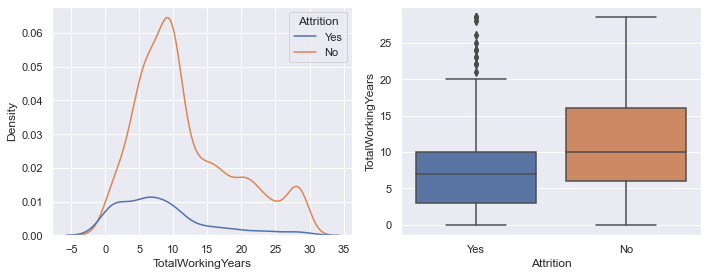

In [62]:
# Observing relation between 'TotalWorkingYears' and 'Attrition'
bivariate_plot('TotalWorkingYears', 'Attrition')

- Less experienced people tend to have higher attrition rate.

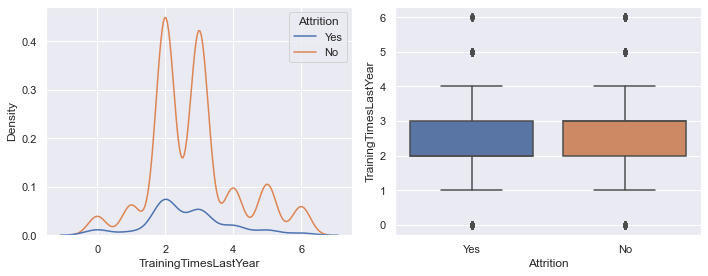

In [63]:
# Observing relation between 'TrainingTimesLastYear' and 'Attrition'
bivariate_plot('TrainingTimesLastYear', 'Attrition')

- Training time of employee doesn't tell much about the Attrition rate

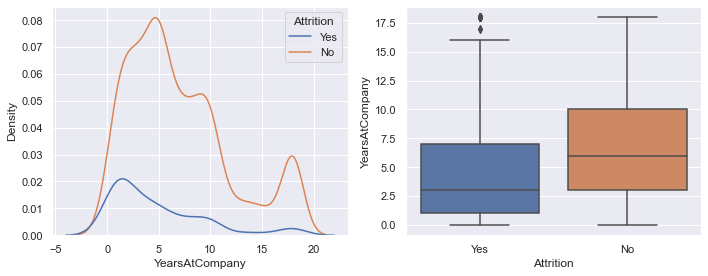

In [64]:
# Observing relation between 'YearsAtCompany' and 'Attrition'
bivariate_plot('YearsAtCompany','Attrition')

- Newer employees with lesser years of experience in this company tend to have higher Attrition Rate.

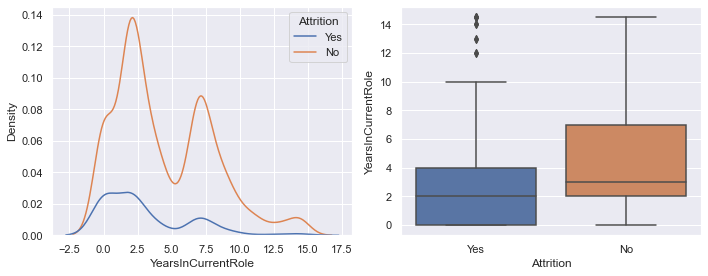

In [65]:
# Observing relation between 'YearsInCurrentRole' and 'Attrition'
bivariate_plot('YearsInCurrentRole','Attrition')

- Employers who are having lesser years of experience in their current role are having higher Attrition rate.
  (Maybe they are not understanding or adapt to their given current role in the company)

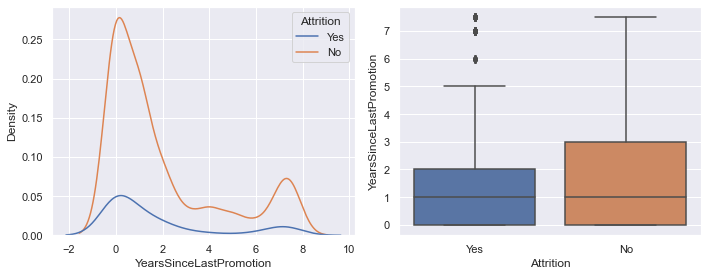

In [66]:
# Observing relation between 'YearsSinceLastPromotion' and 'Attrition'
bivariate_plot('YearsSinceLastPromotion','Attrition')

- Employers with lesser range of years since last promotion are having higher attrition rate.
- Employers with less patience who want quicker promotions will tend to change the companies.

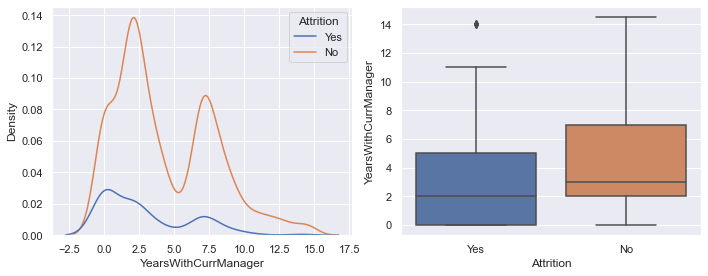

In [67]:
# Observing relation between 'YearsWithCurrManager' and 'Attrition'
bivariate_plot('YearsWithCurrManager','Attrition')

- Employees with lesser years of engagement with their current manager tend to have higher Attrition Rate.
- Also, employees with having certain years of engagemnt (around 7.5 years) with their current manager also tend to  have 
  higher attrition rate. (Maybe in terms of growth prosepective they want change).

###### Multivariate Analysis

In [68]:
# Correlation check
corr_mat = hr.corr()
corr_mat

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.678402   0.023059          0.005074   0.144030   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.278548  -0.021956          0.014240   0.062616   
YearsInCurrentRole        0.210424   0.010869          0.020127   0.060498   
YearsSinceLastPromotion   0.190525  -0.035150          0.009076   0.054477   
YearsWithCurrManager      0.201551  -0.024639          0.012213   0.067225   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.009622   -0.001538       -0.006167   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.002076   -0.025113       -0.006860   
YearsInCurrentRole                       0.021458   -0.024999        0.008478   
YearsSinceLastPromotion                  0.019958   -0.037196       -0.011254   
YearsWithCurrManager                    -0.005938   -0.018328        0.026428   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

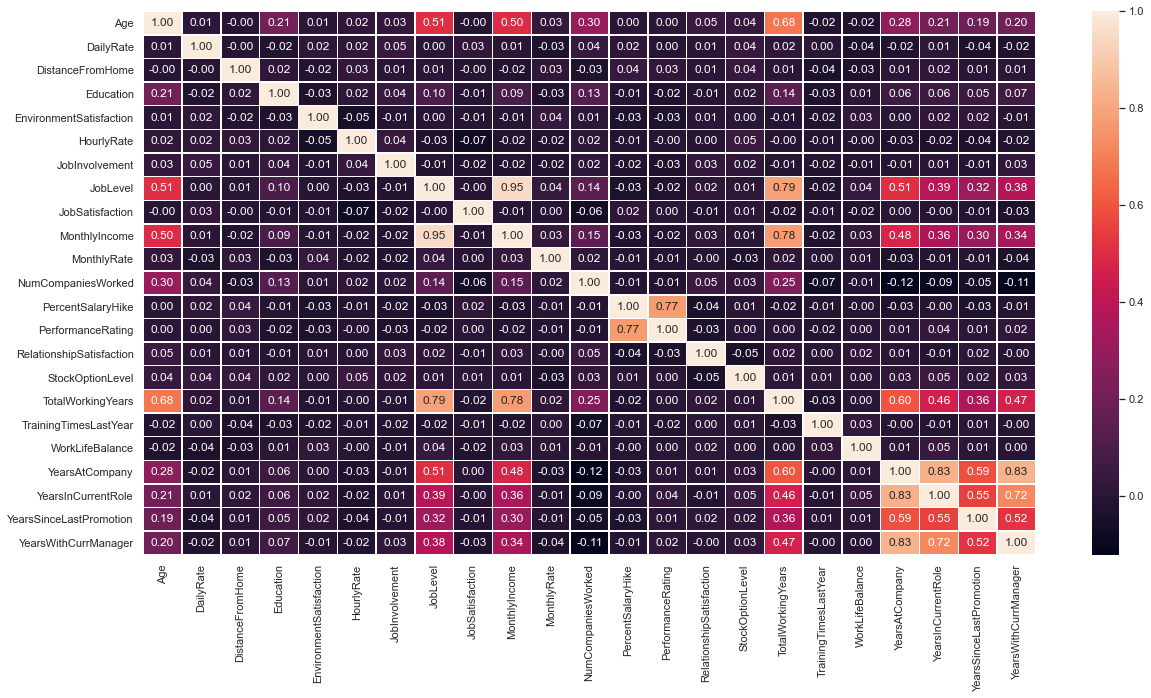

In [69]:
# Visualzing correlation matrix using heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [70]:
corr_mat['Age']['DailyRate']

0.010660942645538154

In [71]:
# Getting highly correlated pairs - using 0.75 and -0.75 as threshold
highly_corr_pairs = []
for i in corr_mat.iteritems():
    for j in corr_mat.iteritems():
        if ((i !=j) and (corr_mat[i[0]][j[0]] >= 0.75)) or ((i !=j) and (corr_mat[i[0]][j[0]] <= - 0.75)):
            highly_corr_pairs.append((i[0],j[0]))

print('Highly Correlated pairs : ',highly_corr_pairs)

# Getting unique pairs
for i in highly_corr_pairs:
    for j in highly_corr_pairs:
        if ((i[0] == j[1]) and (i[1] == j[0])):
            highly_corr_pairs.remove(j)
print('\n-------------------------------------------------------------------------------------------------------------------------------')
print('\nUnique pairs of correlated pairs = ',highly_corr_pairs)

Highly Correlated pairs :  [('JobLevel', 'MonthlyIncome'), ('JobLevel', 'TotalWorkingYears'), ('MonthlyIncome', 'JobLevel'), ('MonthlyIncome', 'TotalWorkingYears'), ('PercentSalaryHike', 'PerformanceRating'), ('PerformanceRating', 'PercentSalaryHike'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MonthlyIncome'), ('YearsAtCompany', 'YearsInCurrentRole'), ('YearsAtCompany', 'YearsWithCurrManager'), ('YearsInCurrentRole', 'YearsAtCompany'), ('YearsWithCurrManager', 'YearsAtCompany')]

-------------------------------------------------------------------------------------------------------------------------------

Unique pairs of correlated pairs =  [('JobLevel', 'MonthlyIncome'), ('JobLevel', 'TotalWorkingYears'), ('MonthlyIncome', 'TotalWorkingYears'), ('PercentSalaryHike', 'PerformanceRating'), ('YearsAtCompany', 'YearsInCurrentRole'), ('YearsAtCompany', 'YearsWithCurrManager')]


- We can remove one of highly correlated columns among the pairs based on business domain knowledge.

- We will first check the correlation of these highly correlated pairs of variables obtained above with our target variable before any removal.

###### Point Biserial Correlation :-
When a variable is dichotomous (having 2 categorical values like Yes/No, True/False) we will encode them 0/1 values.
Then we will will find it's correlation with the continous variable.

In [72]:
# Encoding target variable 'Attrition' having Yes/No value with 0/1
hr['Attrition'] = hr['Attrition'].apply(lambda x : 0 if x == 'No' else 1)
hr['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

In [73]:
# correlation matrix along with target variable
corr_target = hr.corr()
corr_target

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.678402  -0.180628   0.023059          0.005074   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.278548  -0.162211  -0.021956          0.014240   
YearsInCurrentRole        0.210424  -0.161484   0.010869          0.020127   
YearsSinceLastPromotion   0.190525  -0.037486  -0.035150          0.009076   
YearsWithCurrManager      0.201551  -0.156498  -0.024639          0.012213   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.144030                -0.009622   -0.001538   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.062616                 0.002076   -0.025113   
YearsInCurrentRole         0.060498                 0.021458   -0.024999   
YearsSinceLastPromotion    0.054477                 0.019958   -0.037196   
YearsWithCurrManager       0.067225                -0.005938   -0.018328   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

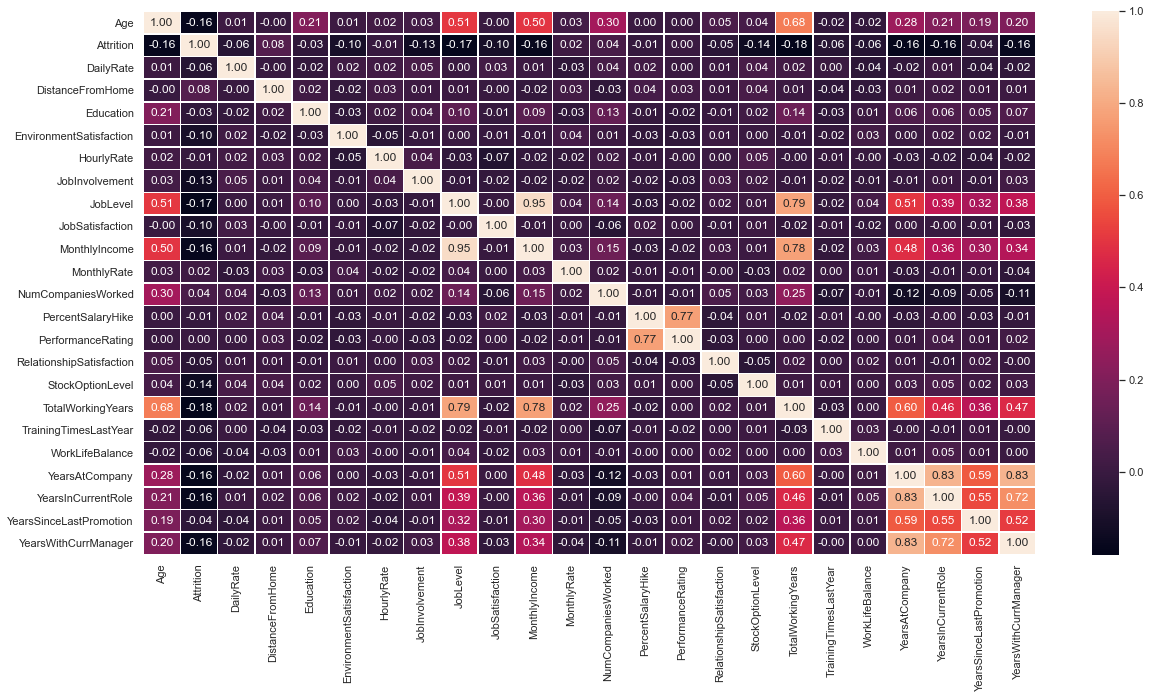

In [74]:
# Visualzing correlation matrix consisting target variable also - using heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_target, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [75]:
corr_target['JobLevel']['Attrition']

-0.1691047509310352

In [76]:
# Observing correlation of highly correlated pairs variables with "Attrition" target variable
dic = {}
for i in highly_corr_pairs:
    if i[0] not in dic.keys():
        dic.update({i[0] : round(corr_target[i[0]]['Attrition'],2)})
    if i[1] not in dic.keys():
        dic.update({i[1] : round(corr_target[i[1]]['Attrition'],2)})

        # Converting dict -> DataFrame to view in structured form
k = [i for i in dic.keys()]
v = [i for i in dic.values()]

df_corrwithtar = pd.DataFrame(data = v, index = k, columns = ['Correlation with Attrition (target) variable'])
df_corrwithtar

Correlation with Attrition (target) variable
JobLevel                                                     -0.17
MonthlyIncome                                                -0.16
TotalWorkingYears                                            -0.18
PercentSalaryHike                                            -0.01
PerformanceRating                                             0.00
YearsAtCompany                                               -0.16
YearsInCurrentRole                                           -0.16
YearsWithCurrManager                                         -0.16

- Now, based on correlation with target var. we will remove highly correlated variable from the pairs.

In [77]:
highly_corr_pairs

[('JobLevel', 'MonthlyIncome'),
 ('JobLevel', 'TotalWorkingYears'),
 ('MonthlyIncome', 'TotalWorkingYears'),
 ('PercentSalaryHike', 'PerformanceRating'),
 ('YearsAtCompany', 'YearsInCurrentRole'),
 ('YearsAtCompany', 'YearsWithCurrManager')]

 - We will remove following variables :-
            1) Performance Rating (Having zero correlation with Attrition variable)
            2) Years at company
            3) JobLevel
            4) MonthlyIncome

In [78]:
# Forming new DataFrame by removing above variables from hr df
hr_uncorr = hr.drop(['PerformanceRating', 'YearsAtCompany', 'JobLevel','MonthlyIncome'], axis = 1)
hr_uncorr.shape

(2940, 27)

In [79]:
hr_uncorr.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  OverTime  PercentSalaryHike RelationshipSatisfaction  \
0  Female  ...       Yes                 11                        1   
1    Male  ...        No                 23                        4   
2    Male  ...       Yes                 15                        2   
3  Female  ...       Yes                 11                        3   
4    Male  ...        No                 12                        4   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                 0               8.0                      0                1   
1                 1              10.0                      3                3   
2                 0               7.0                      3                3   
3                 0               8.0                      3                3   
4                 1               6.0                      3                3   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                4.0                      0.0                   5.0  
1                7.0                      1.0                   7.0  
2                0.0                      0.0                   0.0  
3                7.0                      3.0                   0.0  
4                2.0                      2.0                   2.0  

[5 rows x 27 columns]

###### Encoding of categorical variables

In [80]:
# Categorical Encoding - using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in hr_uncorr.columns:
    if hr_uncorr[i].dtypes == 'object':
        hr_uncorr[i] = le.fit_transform(hr_uncorr[i])

In [81]:
hr_uncorr.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  OverTime  \
0          2               1                        2       0  ...         1   
1          1               1                        3       1  ...         0   
2          2               4                        4       1  ...         1   
3          4               1                        4       0  ...         1   
4          1               3                        1       1  ...         0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                8.0                      0                1   
1               10.0                      3                3   
2                7.0                      3                3   
3                8.0                      3                3   
4                6.0                      3                3   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 27 columns]

###### Splitting dataset into features and target

In [82]:
x = hr_uncorr.drop(['Attrition'], axis = 1)
y = hr_uncorr['Attrition']

###### Standardization

In [83]:
# Standardization - using RobustScaler 
# (advantages of Robust Scaler - robust to outliers and doesn't assume data to be normally distributed)
# Robust Scaler(xi) = (xi - Q1(x))/(Q3(x) - Q1(x)) 

from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
std_x = rs.fit_transform(x)

###### Splitting data into train and test set

In [84]:
# Train set - to train the model on training set
# Test set - to test the model on the test set
# (In actual scenario, we split our given dataset into training set and vaidation set - to train and validation our model
# resp. and use separate test data to test the model - test set act as double check of performance of the model. Here, we
# don't have separate test set so, we split our dataset into train and test data.)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size = 0.2)

In [85]:
# Evaluating quality of split
#This is done using measures of central tendency (means) and measures of spread (standard deviation)
# If train and test data have nearly same mean and std. dev. among each other and with original data set as well then,
# the split is good and representative of original set

print('Overall mean of original set x = ',std_x.mean())
print('Overall mean of train set x = ',x_train.mean())
print('Overall mean of test set x = ',x_test.mean())

Overall mean of original set x =  0.0026727555037154983
Overall mean of train set x =  0.005684969354138604
Overall mean of test set x =  -0.009376099897976919


###### Model Building

Since this is a classification problem, we will use following models to check how data performs/ predicts :-
- 1) Decision Tree
- 2) Random Forest
- 3) K - Nearest Neighbour
- 4) Support Vector Machine (SVM)
- 5) Logistic Regression
- 6) Naive Bayes (Gaussian)

###### Decision Tree

In [86]:
# Importing Decision Tree model library
from sklearn.tree import DecisionTreeClassifier

In [87]:
# Instantiating the decision tree model
dt = DecisionTreeClassifier()

In [88]:
# Hyper-parameter tuning using GridSearchCV - to get best parameters
from sklearn.model_selection import GridSearchCV

In [89]:
# Dictionary of parameters to be input to GridSearchCV
param = {'criterion' :['gini','entropy'], 'max_depth' : range(2,10), 'min_samples_split' : range(4,10), 'ccp_alpha' : [0.00,0.01,0.02]}

In [90]:
gs_cv = GridSearchCV(estimator = dt, param_grid = param,n_jobs = 3, cv = 5)

In [91]:
gs_cv.fit(std_x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_split': range(4, 10)})

In [92]:
gs_cv.cv_results_

{'mean_fit_time': array([0.54447079, 0.01598859, 0.00939326, 0.0083951 , 0.00799513,
        0.00759573, 0.00979261, 0.01119399, 0.00899162, 0.00919452,
        0.01119366, 0.01019287, 0.01199141, 0.01299152, 0.01119318,
        0.01218953, 0.01259031, 0.01259069, 0.01519055, 0.01499   ,
        0.01319151, 0.01199045, 0.01438966, 0.01319098, 0.01459036,
        0.01778874, 0.01758895, 0.01658931, 0.01758838, 0.0163909 ,
        0.01778879, 0.01958814, 0.02058706, 0.02058578, 0.01958733,
        0.02238626, 0.02118783, 0.02258563, 0.02218647, 0.02198639,
        0.02358518, 0.02258592, 0.02158566, 0.02398419, 0.02358489,
        0.02198715, 0.02318654, 0.02398329, 0.00739551, 0.00739374,
        0.00699487, 0.00879483, 0.00819473, 0.00719719, 0.01179152,
        0.01099229, 0.01199327, 0.01019287, 0.0107923 , 0.01039338,
        0.01478901, 0.01199222, 0.0139915 , 0.01359015, 0.01199222,
        0.01339245, 0.01778812, 0.01738849, 0.01858821, 0.01579027,
        0.01938844, 0.01698976,

In [93]:
gs_cv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 4}

In [94]:
gs_cv.best_score_ # Best score which can be achieved from model

0.9391156462585034

###### Thus from hyperparameter tuning we got the best parameters for Decision Tree model, which are :-
- 'ccp_alpha': 0.0,
- 'criterion': 'entropy',
- 'max_depth': 9,
- 'min_samples_split': 4

In [95]:
# Fitting (Training) the Decision Tree with the best hyperparameters which we got from GridSearchCV
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4)

In [96]:
# Evaluating training and testing accuracy to ensure that there is no overfitting scenrio
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

train_acc = dt.score(x_train, y_train)
print('Training accuracy of Decision Tree model = ',train_acc)
test_acc = dt.score(x_test, y_test)
print('Testing accuracy of Decision Tree model = ',test_acc)

Training accuracy of Decision Tree model =  0.9778911564625851
Testing accuracy of Decision Tree model =  0.9319727891156463


Training and testing accuracy are close enough, so there doesn't seem to be Overfitting case scenario.

In [97]:
# Cross - Validation Score
from sklearn.model_selection import cross_val_score

In [98]:
cvscore = cross_val_score(dt, std_x, y, cv = 5)

In [99]:
cvscore

array([0.94557823, 0.95238095, 0.97789116, 0.95068027, 0.95408163])

In [100]:
# Mean cross - validation score
cvscore.mean()

0.9561224489795919

In [101]:
# Cross score on multiple metrics
from sklearn.model_selection import cross_validate
score_matrix = ['precision_macro', 'recall_macro', 'accuracy']
cross_validate(dt, std_x, y, cv = 5, scoring = score_matrix)

{'fit_time': array([0.0569675 , 0.08195329, 0.04397464, 0.02198434, 0.01998758]),
 'score_time': array([0.04304242, 0.01399136, 0.01099491, 0.00299859, 0.00399923]),
 'test_precision_macro': array([0.9515444 , 0.93953983, 0.95831872, 0.94865391, 0.92393218]),
 'test_recall_macro': array([0.84958898, 0.85282374, 0.94654639, 0.86436426, 0.89413386]),
 'test_accuracy': array([0.94727891, 0.94557823, 0.9744898 , 0.95068027, 0.95238095])}

- We are getting good accuracy, precision and recall cross-validated score

In [102]:
# Predictions of D.T. model
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###### Evaluation of D.T. model

In [103]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification Report of Decision Tree Model on HR Attrition Data Set :\n',report)

Classification Report of Decision Tree Model on HR Attrition Data Set :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       496
           1       0.82      0.72      0.77        92

    accuracy                           0.93       588
   macro avg       0.89      0.84      0.86       588
weighted avg       0.93      0.93      0.93       588



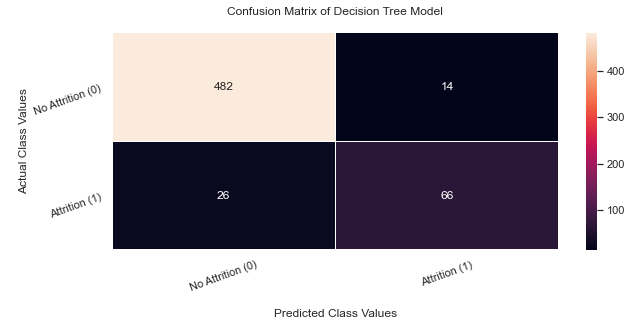

In [104]:
# Confusion Matrix - Visualzing using heatmap
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

sns.set_theme()
f, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels = ['No Attrition (0)', 'Attrition (1)']
           , yticklabels = ['No Attrition (0)', 'Attrition (1)'])
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.xlabel('\nPredicted Class Values')
plt.ylabel('\nActual Class Values')
plt.title('Confusion Matrix of Decision Tree Model\n')
plt.show()

In [105]:
# ROC - AUC Curve
y_prob = dt.predict_proba(x_test)
df_y_prob = pd.DataFrame(y_prob, columns = ['Prob. of class 0 pred.', 'Prob. of class 1 pred.'])
df_y_prob

Prob. of class 0 pred.  Prob. of class 1 pred.
0                       1.0                     0.0
1                       1.0                     0.0
2                       1.0                     0.0
3                       0.0                     1.0
4                       1.0                     0.0
..                      ...                     ...
583                     1.0                     0.0
584                     0.0                     1.0
585                     1.0                     0.0
586                     1.0                     0.0
587                     1.0                     0.0

[588 rows x 2 columns]

In [106]:
y_proba = df_y_prob['Prob. of class 1 pred.'] # This is required for ROC-AUC Curve plotting
y_proba 

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
583    0.0
584    1.0
585    0.0
586    0.0
587    0.0
Name: Prob. of class 1 pred., Length: 588, dtype: float64

In [107]:
# ROC Curve
from sklearn.metrics import roc_curve
tpr, fpr, thresholds = roc_curve(y_test, y_proba)

In [108]:
# AUC 
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, y_proba)*100,2)
print('AUC score of Decision Tree Model = ',auc,'%')

AUC score of Decision Tree Model =  91.98 %


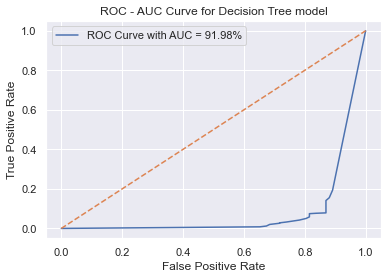

In [109]:
# Plotting ROC - AUC Curve
sns.set_theme()
plt.plot(fpr, tpr, '-', label = f'ROC Curve with AUC = {auc}%')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve for Decision Tree model')
plt.legend()
plt.show()

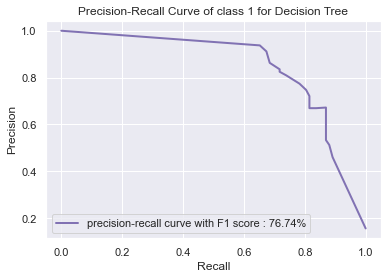

In [326]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for Decision Tree')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary
  classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is 
  our prime focus in this problem statement.

###### Random Forest

In [110]:
# Importing Random Forest Library
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Instantiating the model
rf = RandomForestClassifier()

In [112]:
# Hyperparameter tuning using GridSearchCV - to get the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [113]:
param_rf = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(2,20), 'max_features' : ["auto", "sqrt", "log2"]
           , 'max_samples' : [200,300,400,500]}

# We haven't included n_estimators as we will calculate it using oob error rate.

In [114]:
gs_cv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, n_jobs = 3, cv = 5)

In [115]:
gs_cv_rf.fit(std_x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [200, 300, 400, 500]})

In [116]:
gs_cv_rf.cv_results_

{'mean_fit_time': array([0.48312149, 0.4313518 , 0.40876412, 0.45054016, 0.45313902,
        0.42595339, 0.36738825, 0.41755977, 0.37734709, 0.33020959,
        0.385779  , 0.41376033, 0.38457747, 0.36259117, 0.34660125,
        0.37718225, 0.36119184, 0.44614277, 0.38037972, 0.41496129,
        0.35539632, 0.40576711, 0.42555285, 0.37418427, 0.34879837,
        0.38897586, 0.47892318, 0.53609338, 0.39437289, 0.40916362,
        0.39257398, 0.43295927, 0.39777431, 0.3919733 , 0.4595355 ,
        0.44934063, 0.44274426, 0.38777604, 0.57306938, 0.51810222,
        0.43075261, 0.45093985, 0.46053562, 0.44254565, 0.38197999,
        0.42535534, 0.42775321, 0.42855272, 0.4559371 , 0.48072286,
        0.54768276, 0.59405465, 0.46453214, 0.47192812, 0.52689738,
        0.56567464, 0.52209625, 0.41835852, 0.46213326, 0.48771815,
        0.40636621, 0.47572641, 0.53229251, 0.46293344, 0.37538347,
        0.36458936, 0.39877043, 0.42715321, 0.35359464, 0.40176802,
        0.42755299, 0.41056099,

In [117]:
gs_cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_samples': 500}

In [118]:
gs_cv_rf.best_score_   # Best score which can be achieved by the model

0.8884353741496598

In [119]:
# Instantiating the Random Forest with the best hyperparameters which we got from GridSearchCV
rf = RandomForestClassifier(criterion = 'gini', max_depth = 17, max_features = 'log2', max_samples = 500)

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
# OOB Error Rate
rf.set_params(warm_start = True, oob_score = True)
# warm_start - reuse the solution of the previous call to fit and add more estimators to the ensemble
# oob_score - use out-of-bag samples to estimate the generalization accuracy and to get n_estimators

#Specifying range of n_estimators (no. Decision Trees in RandomForest model)
n_estimators_range = range(15,1001)

oob_error = {}
for i in n_estimators_range:
    rf.set_params(n_estimators = i)
    rf.fit(x_train,y_train)
    oob_score = rf.oob_score
    oob_error_rate = 1 - oob_score
    oob_error.update({i : oob_error_rate})

In [122]:
print(oob_error)

{15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 0, 146: 0, 147: 0, 148: 0, 149: 0, 150:

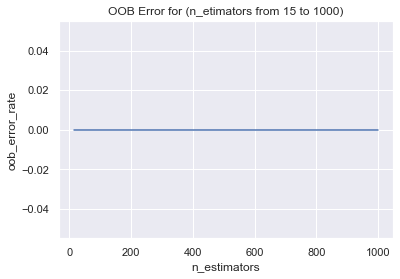

In [123]:
plt.plot(oob_error.keys(), oob_error.values(), '-')
plt.xlabel('n_estimators')
plt.ylabel('oob_error_rate')
plt.title('OOB Error for (n_etimators from 15 to 1000)')
plt.show()

- We can observe that for all n_estimators ranging from 15,1000 , the oob_error_rate is 0 for all cases. Hence, we won't be
  able to decide optimal no. of decision trees based on oob_error_rate.
- Let's take default 500 n_estimators then.

In [124]:
# Fitting and Training the model with best hyperparameters we got from GridSearchCV
rf = RandomForestClassifier(n_estimators = 500 , criterion = 'gini', max_depth = 12, max_features = 'log2', max_samples = 500)

In [125]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, max_features='log2', max_samples=500,
                       n_estimators=500)

In [126]:
# Evaluating training and testing accuracy to ensure that there is no overfitting scenrio
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

train_acc_rf = rf.score(x_train, y_train)
print('Training accuracy of Decision Tree model = ',train_acc_rf)
test_acc_rf = rf.score(x_test, y_test)
print('Testing accuracy of Decision Tree model = ',test_acc_rf)

Training accuracy of Decision Tree model =  0.9272959183673469
Testing accuracy of Decision Tree model =  0.8792517006802721


Training and testing accuracy of Random Forest Model are close enough, so there doesn't seem to be an overfitting scenario.

In [127]:
# Cross - Validation
from sklearn.model_selection import cross_val_score

In [128]:
cvscore = cross_val_score(rf, std_x, y, cv = 5)
print('Cross validated scores of 5 folds : ',cvscore)
print('Mean cross validated score = ',cvscore.mean())

Cross validated scores of 5 folds :  [0.87244898 0.87755102 0.87585034 0.88095238 0.88605442]
Mean cross validated score =  0.8785714285714284


We can observe consistant cross validation scores for 5 folds.

In [129]:
# Cross - Validation score on multiple metrices
from sklearn.model_selection import cross_validate
score_matrix = ['precision_macro', 'recall_macro', 'accuracy', 'f1']
cross_validate(rf, std_x, y, cv = 5, scoring = score_matrix)

{'fit_time': array([1.96886945, 2.35264635, 1.8979075 , 1.93588948, 2.07380748]),
 'score_time': array([0.20687747, 0.19291162, 0.18089628, 0.15390921, 0.11890936]),
 'test_precision_macro': array([0.93321617, 0.92419355, 0.93474427, 0.93783304, 0.92087542]),
 'test_recall_macro': array([0.6       , 0.65161738, 0.61052632, 0.63157895, 0.63728573]),
 'test_accuracy': array([0.8707483 , 0.88605442, 0.87414966, 0.88095238, 0.88265306]),
 'test_f1': array([0.33333333, 0.464     , 0.36206897, 0.41666667, 0.42975207])}

In [130]:
# Predictions of Random Forest Model
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
# Features importance using Random Forest model
feature_importance = rf.feature_importances_   # gini gain based importance of features

# Plotting feature importance - horizontal bar plot
features = list(hr_uncorr.columns)
features.remove('Attrition')
df_feat_imp = pd.DataFrame(feature_importance, index = features, columns = ['Gini Gain based feature importance Value'])
sorted_df = df_feat_imp.sort_values(by= 'Gini Gain based feature importance Value', axis = 0, ascending = True)
sorted_df

Gini Gain based feature importance Value
Gender                                                    0.011017
Department                                                0.014842
BusinessTravel                                            0.016423
MaritalStatus                                             0.025257
Education                                                 0.025658
RelationshipSatisfaction                                  0.027825
YearsSinceLastPromotion                                   0.028199
EducationField                                            0.028817
JobInvolvement                                            0.029741
WorkLifeBalance                                           0.030448
StockOptionLevel                                          0.031474
JobSatisfaction                                           0.031759
TrainingTimesLastYear                                     0.033574
EnvironmentSatisfaction                                   0.036771
PercentSalaryHike                                         0.039751
JobRole                                                   0.040527
YearsInCurrentRole                                        0.041466
YearsWithCurrManager                                      0.041872
NumCompaniesWorked                                        0.042810
OverTime                                                  0.046147
DistanceFromHome                                          0.051219
HourlyRate                                                0.054981
MonthlyRate                                               0.059868
DailyRate                                                 0.062894
TotalWorkingYears                                         0.070279
Age                                                       0.076381

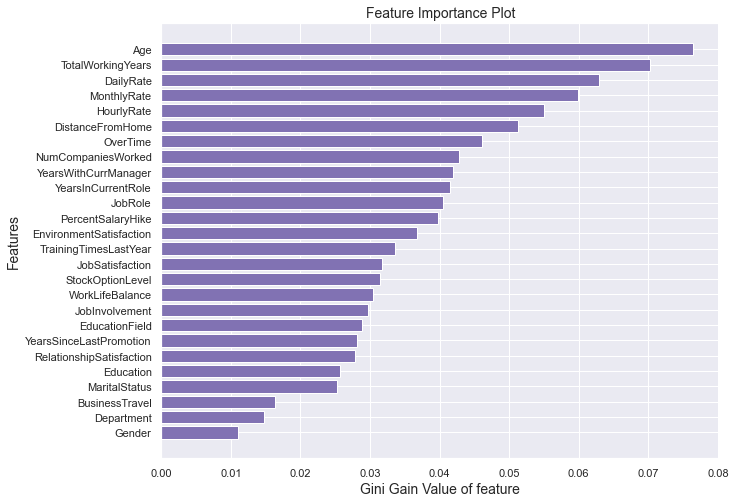

In [132]:
# Plotting of feature importance
sorted_features = list(sorted_df.index)
plt.figure(figsize = (10,8))
plt.barh(range(1,len(sorted_df) + 1), width = sorted_df['Gini Gain based feature importance Value'], color = 'm')
plt.title('Feature Importance Plot', fontdict = {'fontsize' : 14})
plt.ylabel('Features', fontdict = {'fontsize' : 14})
plt.yticks(ticks = range(1,len(sorted_df) + 1), labels = sorted_features)
plt.xlabel('Gini Gain Value of feature', fontdict = {'fontsize' : 14})
plt.show()

Thus, by Random Forest model, age and total working years of employees gain higher feature importance.

###### Evaluation of Random Forest Model

In [133]:
# Classification Report of Random Forest Model
from sklearn.metrics import classification_report
report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report of Random Forest Model on HR Attrition Data Set :\n',report_rf)

Classification Report of Random Forest Model on HR Attrition Data Set :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       496
           1       1.00      0.23      0.37        92

    accuracy                           0.88       588
   macro avg       0.94      0.61      0.65       588
weighted avg       0.89      0.88      0.85       588



We can observe that Random Forest model doesn't have great recall value for positive class (1 - Attrition).

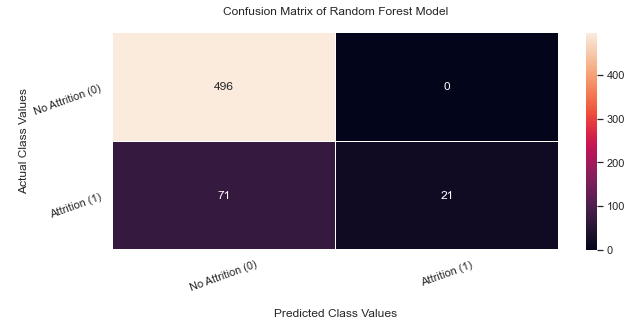

In [134]:
# Confusion Matrix - Visualzing using heatmap
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_rf)

sns.set_theme()
f, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels = ['No Attrition (0)', 'Attrition (1)']
           , yticklabels = ['No Attrition (0)', 'Attrition (1)'])
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.xlabel('\nPredicted Class Values')
plt.ylabel('\nActual Class Values')
plt.title('Confusion Matrix of Random Forest Model\n')
plt.show()

In [135]:
# Getting prob. of class 1 for input it to the ROC - AUC Curve
y_prob_rf = rf.predict_proba(x_test)
df_y_prob_rf = pd.DataFrame(y_prob_rf, columns = ['Prob. of class 0 pred.', 'Prob. of class 1 pred.'])
df_y_prob_rf

Prob. of class 0 pred.  Prob. of class 1 pred.
0                  0.896438                0.103562
1                  0.946599                0.053401
2                  0.962256                0.037744
3                  0.528133                0.471867
4                  0.924114                0.075886
..                      ...                     ...
583                0.803688                0.196312
584                0.311590                0.688410
585                0.772505                0.227495
586                0.916426                0.083574
587                0.753588                0.246412

[588 rows x 2 columns]

In [136]:
# ROC - AUC Curve for positive class - 1
y_proba_rf = df_y_prob_rf['Prob. of class 1 pred.']
y_proba_rf

0      0.103562
1      0.053401
2      0.037744
3      0.471867
4      0.075886
         ...   
583    0.196312
584    0.688410
585    0.227495
586    0.083574
587    0.246412
Name: Prob. of class 1 pred., Length: 588, dtype: float64

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve

In [317]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

In [318]:
auc_score_rf = round(roc_auc_score(y_test, y_proba_rf)*100,2)
print('AUC of ROC-AUC Curve for class 1 in Random Forest Model = ',auc_score_rf,'%')

AUC of ROC-AUC Curve for class 1 in Random Forest Model =  97.16 %


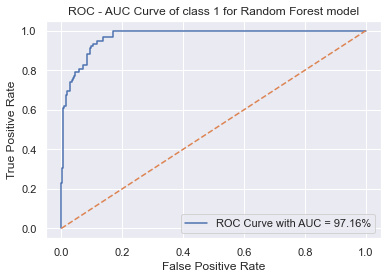

In [319]:
# Plotting ROC - AUC Curve for Random Forest Model
sns.set_theme()
plt.plot(fpr, tpr, '-', label = f'ROC Curve with AUC = {auc_score_rf}%')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve of class 1 for Random Forest model')
plt.legend()
plt.show()

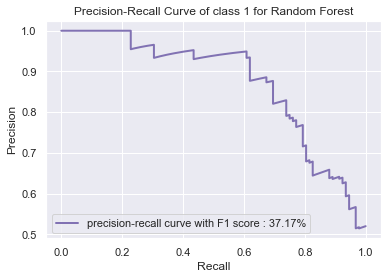

In [320]:
# Precision-Recall Curve for Random Forest Model
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred_rf)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for Random Forest')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is our prime focus in this problem statement.

###### Support Vector Machine (SVM)

In [141]:
# Importing Support Vector Machine Classifier
from sklearn.svm import SVC

In [142]:
# Instantiating the model
svm_clf = SVC()

In [143]:
# Hyperparameter Tuning using GridSearchCV for getting best hyperparameters
param_svc = {'C': [0.1, 0.01, 0.001, 0.0001, 1],'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : [2,3,4,5], 'gamma' : [0.1, 0.01, 0.001, 0.0001, 1]}
gs_cv_svc = GridSearchCV(estimator = svm_clf, param_grid = param_svc,cv = 5)

In [144]:
gs_cv_svc.fit(std_x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001, 1],
                         'degree': [2, 3, 4, 5],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [145]:
# Getting best hyperparameters for SVC model
gs_cv_svc.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [146]:
# Getting best score for SVC model
gs_cv_svc.best_score_

1.0

In [185]:
# Fitting and training the model with the best hyperparameters we have got from GridSearchCV
svm_clf = SVC(C = 0.1, kernel = 'poly', degree = 3, gamma = 1, probability = True)
svm_clf.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly', probability=True)

In [186]:
# Evaluating training and testing accuracy to analyse if any overfitting scenario or not
train_acc_svm = round(svm_clf.score(x_train, y_train)*100,2)
print('Training accuracy of SVM model = ',train_acc_svm,'%')

test_acc_svm = round(svm_clf.score(x_test, y_test)*100,2)
print('Testing accuracy of SVM model = ',test_acc_svm,'%')

Training accuracy of SVM model =  100.0 %
Testing accuracy of SVM model =  96.6 %


We can observe that although training accuracy of SVM model is 100% but testing accuracy of model is also high around 96%
and hence reasonably close enough to infer that it doesn't overfit.

In [187]:
# Cross Validation score
cv_score_svm = cross_val_score(svm_clf, std_x, y, scoring = 'accuracy',cv = 5)
print('Cross Validation accuracy scores on 5 folds for SVM model = ',cv_score_svm)

mean_cv_score= cv_score_svm.mean()
print('Mean Cross Validation Score = ', mean_cv_score)

Cross Validation accuracy scores on 5 folds for SVM model =  [1. 1. 1. 1. 1.]
Mean Cross Validation Score =  1.0


SVM model is performing very well over HR attrition dataset as we are getting 100% accuracy scores over 5 folds.

In [188]:
# Cross Validation scores over multiple metrices
cross_validate(svm_clf, std_x, y, scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1'], cv = 5)

{'fit_time': array([0.81855249, 0.76655912, 0.82650566, 0.88208938, 0.97501159]),
 'score_time': array([0.01896477, 0.0210104 , 0.01999116, 0.02098823, 0.01898885]),
 'test_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([1., 1., 1., 1., 1.]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1': array([1., 1., 1., 1., 1.])}

Recall , precision F1 scores are very good in svm.

In [189]:
# Predictions of test data by SVM model
y_pred_svm = svm_clf.predict(x_test)
y_pred_svm

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###### Evaluation of SVM model

In [190]:
# Importing required evlaution metrices and plots
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve ,plot_roc_curve, roc_auc_score

In [191]:
# Classification Report
svm_report = classification_report(y_test, y_pred_svm)
print('Classification Report of SVM model :\n',svm_report)

Classification Report of SVM model :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       496
           1       0.88      0.91      0.89        92

    accuracy                           0.97       588
   macro avg       0.93      0.94      0.94       588
weighted avg       0.97      0.97      0.97       588



- We can observe higher F1 score which is 89% for our main class of focus (1).
- Hence, SVM model is performing better in our problem statement.

In [192]:
# Confusion Matrix of SVM Model
conf_mat_svm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of SVM model :\n',conf_mat_svm)

Confusion Matrix of SVM model :
 [[482  14]
 [ 26  66]]


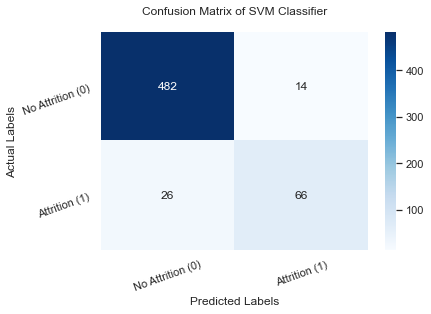

In [193]:
# Plotting confusion matrix of SVM Model
sns.heatmap(conf_mat_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No Attrition (0)', 'Attrition (1)']
           , yticklabels = ['No Attrition (0)', 'Attrition (1)'])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix of SVM Classifier\n')
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.show()

AUC Score of SVM Model =  92.89 %


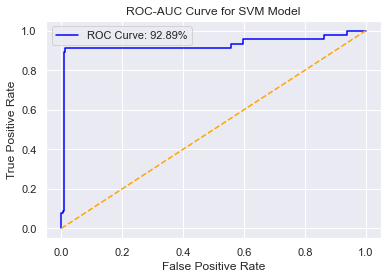

In [245]:
# ROC - AUC Curve for class 1 (Attrition)
y_prob_svm = svm_clf.predict_proba(x_test)
df_y_prob_svm = pd.DataFrame(y_prob_svm, columns = ['Prob(0)', 'Prob(1)'])
y_prob1_svm = df_y_prob_svm['Prob(1)'] # This is required to input it to roc-auc curve

fpr,tpr, thresholds = roc_curve(y_test, y_prob1_svm)
auc_svm = round(roc_auc_score(y_test, y_prob1_svm)*100,2)
print('AUC Score of SVM Model = ',auc_svm,'%')

# Plotting ROC - AUC Curve
plt.plot(fpr, tpr, '-', label = f'ROC Curve: {auc_svm}%', color = 'blue')
plt.plot([0,1], [0,1], '--', color = 'orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for SVM Model')
plt.legend()
plt.show()

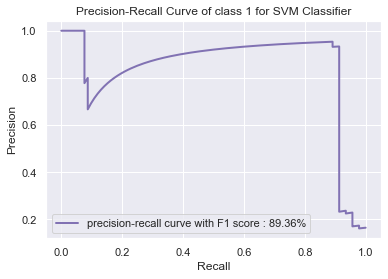

In [321]:
# Precision-Recall Curve for SVC
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred_svm)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_prob1_svm)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for SVM Classifier')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is our prime focus in this problem statement.

###### Logistic Regression

In [205]:
# Importing the required pacakage
from sklearn.linear_model import LogisticRegression

In [206]:
# Instantiating the model
log_reg = LogisticRegression()

In [213]:
# Hyperparameter tuning using GridSearchCV to get best hyperparameters for our model
param_log_reg = {'penalty' : ['l1', 'l2', 'elasticnet'], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' : [100,500,1000]}
gs_cv_log_reg = GridSearchCV(estimator = log_reg, param_grid = param_log_reg, cv = 5)

In [214]:
gs_cv_log_reg.fit(std_x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [215]:
# Getting best hyperparameters
gs_cv_log_reg.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [216]:
gs_cv_log_reg.best_score_ # best score which can be achieved by logistic Regression model

0.8751700680272109

In [220]:
# Fitting (training) log. reg. model with best hyperparameters
log_reg = LogisticRegression(max_iter =  100, penalty  = 'l2', solver = 'newton-cg')
log_reg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [222]:
# Evaluating training and testing accuracy for any overfitting scenario
train_acc_logr = round(log_reg.score(x_train, y_train)*100,2)
print('Training Accuracy of Logistic Regression model = ',train_acc_logr,'%')

test_acc_logr = round(log_reg.score(x_test, y_test)*100,2)
print('Testing Accuracy of Logistic Regression model = ',test_acc_logr,'%')

Training Accuracy of Logistic Regression model =  88.05 %
Testing Accuracy of Logistic Regression model =  87.59 %


We observe training and testing accuracy close enough to each other, hence there isn't overtting case here.

In [231]:
# Cross Validation Score
cvscore_logr = cross_val_score(log_reg, std_x, y, scoring = 'accuracy', cv = 5)
print('Cross Validated scores of Logistic Reg. model over 5 folds :\n',cvscore_logr)
mean_cvscore_logr = cvscore_logr.mean()
print('\nMean Cross Validation Score of Logistic Regression Model = ',mean_cvscore_logr)

# CV Score on multiple metrices
multi_cvscore_logr = cross_validate(log_reg, std_x, y, scoring = ['precision_macro','recall_macro','accuracy', 'f1'] , cv = 5)
print('\nCross Validation Score of Logistic Regression Model over multiple metrices:\n',multi_cvscore_logr)

Cross Validated scores of Logistic Reg. model over 5 folds :
 [0.88095238 0.86904762 0.88435374 0.86564626 0.87585034]

Mean Cross Validation Score of Logistic Regression Model =  0.8751700680272109

Cross Validation Score of Logistic Regression Model over multiple metrices:
 {'fit_time': array([0.0469687 , 0.03697944, 0.03598046, 0.02898574, 0.03398299]), 'score_time': array([0.00699544, 0.00799489, 0.0039947 , 0.00599551, 0.00699258]), 'test_precision_macro': array([0.82845007, 0.7934492 , 0.83487941, 0.78116644, 0.81049724]), 'test_recall_macro': array([0.6783175 , 0.64997331, 0.68884381, 0.64369595, 0.66338617]), 'test_accuracy': array([0.88095238, 0.86904762, 0.88435374, 0.86564626, 0.87585034]), 'test_f1': array([0.50704225, 0.44604317, 0.52777778, 0.43165468, 0.47482014])}


- We observe that Logistic Reg. has poor recall and F1 score over 5 fold cross validation.

In [232]:
# Predictions on test data by log. reg. model
y_pred_logr = log_reg.predict(x_test)
y_pred_logr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###### Evaluation of Logistic Regression model

In [233]:
# Importing required libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [234]:
# Classification Report of Logistic Regression Model
report_logr = classification_report(y_test, y_pred_logr)
print('Classification Report of Logistic Regression Model :\n',report_logr)

Classification Report of Logistic Regression Model :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       496
           1       0.70      0.36      0.47        92

    accuracy                           0.88       588
   macro avg       0.80      0.67      0.70       588
weighted avg       0.86      0.88      0.86       588



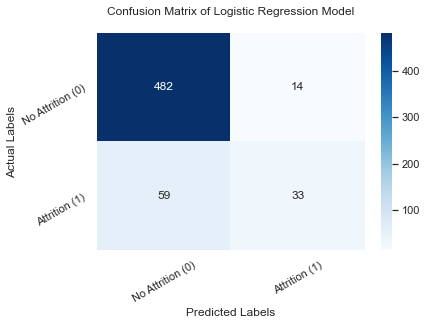

In [237]:
# Confusion Matrix
conf_mat_logr = confusion_matrix(y_test, y_pred_logr)
sns.heatmap(conf_mat_logr, annot = True, fmt = 'd', xticklabels = ['No Attrition (0)', 'Attrition (1)'], yticklabels = ['No Attrition (0)', 'Attrition (1)'], cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title('Confusion Matrix of Logistic Regression Model\n')
plt.show()

AUC Score of Logistic Regression Model =  80.66 %


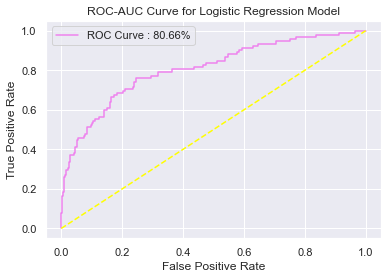

In [244]:
# ROC - AUC Curve for class 1 (Attrition)
y_prob_logr = log_reg.predict_proba(x_test)
df_y_prob_logr = pd.DataFrame(y_prob_logr, columns = ['Prob(0)', 'Prob(1)'])
y_prob1_logr = df_y_prob_logr['Prob(1)'] # Prob. values of class 1 will be used to input it to roc-auc curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob1_logr)
auc_logr = round(roc_auc_score(y_test, y_prob1_logr)*100,2)
print('AUC Score of Logistic Regression Model = ',auc_logr,'%')

# Plotting ROC - AUC Curve
plt.plot(fpr, tpr, '-', label = f'ROC Curve : {auc_logr}%', color = 'violet')
plt.plot([0,1], [0,1], '--', color = 'yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Logistic Regression Model')
plt.legend()
plt.show()

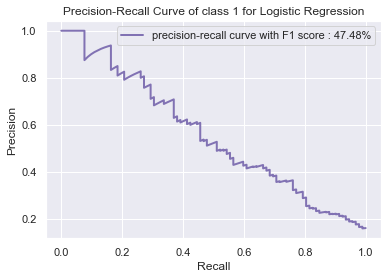

In [327]:
# Precision-Recall Curve for Logistic Regression 
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred_logr)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_prob1_logr)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for Logistic Regression')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is our prime focus in this problem statement.

###### K Nearest Neighbors

In [246]:
# Importing required package
from sklearn.neighbors import KNeighborsClassifier

In [247]:
# Instantiating the model
knn = KNeighborsClassifier()

Parameters we will use in KNN model:-
- Algorithm :- 'auto' (automatically best algorithm to be used to compute nearest neighbors)
- Distance Metric :- we will use 'Eucleadean distance' (i.e, Minkowski Distance with p = 2).

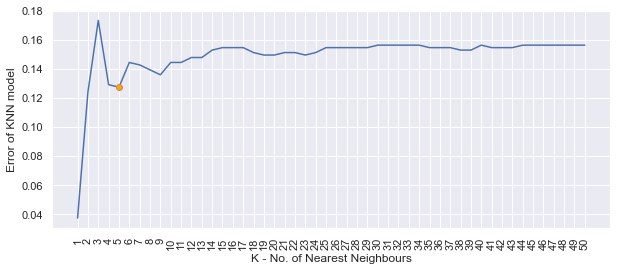

In [275]:
# Determining value of k - no. of nearest neighbours by plotting error_rate v/s k
from sklearn.metrics import accuracy_score
error_list = []
k_range = range(1,51)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='auto',p=2,metric='minkowski')
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    error = 1 - accuracy
    error_list.append(error)

sns.set_theme()
plt.figure(figsize = (10,4))
plt.plot(k_range, error_list, linestyle = '-')
plt.xticks(k_range, rotation = 90)
plt.xlabel('K - No. of Nearest Neighbours')
plt.ylabel('Error of KNN model')
plt.plot([5], [error_list[4]], marker = 'o', markerfacecolor = 'orange')
plt.show()

- We can observe minimum error at K = 1, but this is an overfitting scenario and may also consider only outlier point as neighbors to predict
- Optimal value of K seems to be 5 where we have second minimized error is present.

In [276]:
# Fitting (Training) the KNN model with K = 5
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='auto',p=2,metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [278]:
# Evaluating training and testing accuracy in order to see if any overfitting scenario is there or not
train_acc_knn = round(knn.score(x_train, y_train)*100,2)
print('Training accuracy of KNN Model =',train_acc_knn,'%')

test_acc_knn = round(knn.score(x_test, y_test)*100,2)
print('Test accuracy of KNN model = ',test_acc_knn,'%')

Training accuracy of KNN Model = 89.07 %
Test accuracy of KNN model =  87.24 %


Training and Testing Accuracy seem to be close enough, so, there doesn't seem to be any overfitting scenario.

In [282]:
# Cross Validation Score
cvscore_knn = cross_val_score(knn, std_x, y, cv = 5, scoring = 'accuracy')
print('Cross Validation Score of KNN Model = ',cvscore_knn)
mean_cvscore_knn = cvscore_knn.mean()
print('Mean Cross Validation Score of KNN Model = ',mean_cvscore_knn)

# Cross Validation Score over multiple metrices
multi_cvscore_knn = cross_validate(knn, std_x, y, cv = 5, scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1'])
print('\nCV Score over multiple metrices :\n',multi_cvscore_knn)

Cross Validation Score of KNN Model =  [0.87244898 0.87244898 0.87585034 0.87585034 0.88095238]
Mean Cross Validation Score of KNN Model =  0.8755102040816325

CV Score over multiple metrices :
 {'fit_time': array([0.01998591, 0.01998568, 0.02099514, 0.0199883 , 0.01998734]), 'score_time': array([0.11093831, 0.12793136, 0.1149385 , 0.10796547, 0.11196256]), 'test_precision_macro': array([0.82820048, 0.79111653, 0.82910584, 0.81329215, 0.82600674]), 'test_recall_macro': array([0.63925483, 0.6732465 , 0.65403011, 0.66677698, 0.67503661]), 'test_accuracy': array([0.87244898, 0.87244898, 0.87585034, 0.87585034, 0.88095238]), 'test_f1': array([0.42748092, 0.48979592, 0.45925926, 0.4822695 , 0.5       ])}


- CV Scores seem to be consistant over 5 folds.
- F1 Score doesn't seem to be that great.
- Recall score is also average over 5 folds.
- Precision is good.

In [283]:
# Predictions of test data by KNN
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

###### Evaluation of KNN Model

In [284]:
# Importing required libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [286]:
# Classification Report of KNN Model
report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report of K Nearest Neighbors  Model :\n',report_knn)

Classification Report of K Nearest Neighbors  Model :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       496
           1       0.68      0.35      0.46        92

    accuracy                           0.87       588
   macro avg       0.78      0.66      0.69       588
weighted avg       0.86      0.87      0.85       588



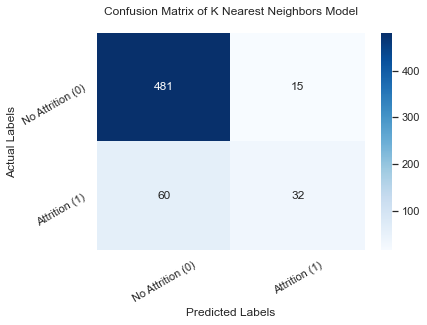

In [287]:
# Confusion Matrix of KNN Model
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot = True, fmt = 'd', xticklabels = ['No Attrition (0)', 'Attrition (1)'], yticklabels = ['No Attrition (0)', 'Attrition (1)'], cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title('Confusion Matrix of K Nearest Neighbors Model\n')
plt.show()

AUC Score of K  Nearest  Neighbors Model =  83.59 %


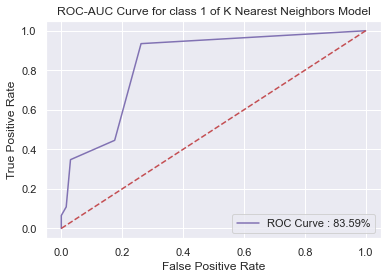

In [292]:
# ROC - AUC Curve for class 1 (Attrition)
y_prob_knn = knn.predict_proba(x_test)
df_y_prob_knn = pd.DataFrame(y_prob_knn, columns = ['Prob(0)', 'Prob(1)'])
y_prob1_knn = df_y_prob_knn['Prob(1)'] # Prob. values of class 1 will be used to input it to roc-auc curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob1_knn)
auc_knn = round(roc_auc_score(y_test, y_prob1_knn)*100,2)
print('AUC Score of K  Nearest  Neighbors Model = ',auc_knn,'%')

# Plotting ROC - AUC Curve
plt.plot(fpr, tpr, '-', label = f'ROC Curve : {auc_knn}%', color = 'm')
plt.plot([0,1], [0,1], '--', color = 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for class 1 of K Nearest Neighbors Model')
plt.legend()
plt.show()

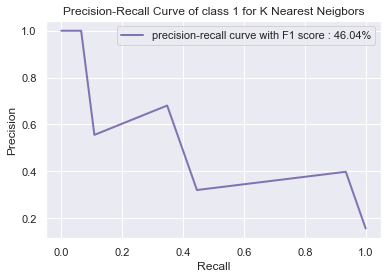

In [328]:
# Precision-Recall Curve for KNN
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred_knn)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_prob1_knn)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for K Nearest Neigbors')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is our prime focus in this problem statement.

###### Naive Bayes' (Gaussian)

Assuming continous variables in the HR Attrition Dataset following Gaussian (Normal) distribution, we will use 
'Gaussian' Naive Bayes' Classifier.

In [293]:
# Importing required library
from sklearn.naive_bayes import GaussianNB

In [294]:
# Instantiating the model
gau_nb = GaussianNB()

- Priors (Prior Probability) : It will be calculated from the training data fitted to the model accordingly.
- var_smoothing : Smoothing technique (like Laplace {alpha = 1}/ Lidstone {alpha < 1}) applied to zero frequency (zero liklihood prob.) features and also to avoid overfitting scenario. Here we are using default smoothing para. viz. 10 ^ -9

In [295]:
# Fitting (Training) the model
gau_nb.fit(x_train, y_train)

GaussianNB()

In [296]:
# Evaluating training and testing accuracy in order to check for any overfitting scenario
train_acc_gnb = round(gau_nb.score(x_train, y_train)*100,2)
print('Training accuracy of Gaussian Naive Bayes model = ',train_acc_gnb,'%')

test_acc_gnb = round(gau_nb.score(x_test, y_test)*100,2)
print('Testing accuracy of Gaussian Naive Bayes model = ',test_acc_gnb,'%')

Training accuracy of Gaussian Naive Bayes model =  85.84 %
Testing accuracy of Gaussian Naive Bayes model =  84.18 %


Train and test accuracy of Gaussian Naive Bayes model seem to be close enough to each other and hence there doesn't seem
to be an overtting scenario.

In [299]:
# Cross Validation Score
cvscore_gnb = cross_val_score(gau_nb, std_x, y, scoring = 'accuracy', cv = 5)
print('Cross Validation scores over 5 folds for Gaussian Naive Bayes model is :\n',cvscore_gnb)

mean_cvscore_gnb = cvscore_gnb.mean()
print('\nMean CV Score of Gaussian Naive Bayes model = ',mean_cvscore_gnb)

# Cross Validation Score over multiple metrices
multi_cvscore_gnb = cross_validate(gau_nb, std_x, y, scoring = ['precision_macro','recall_macro','accuracy','f1'], cv = 5)
print('\nCV Score of Gaussian Naive Bayes over multiple metrices :\n',multi_cvscore_gnb)

Cross Validation scores over 5 folds for Gaussian Naive Bayes model is :
 [0.86734694 0.84013605 0.87755102 0.83163265 0.84693878]

Mean CV Score of Gaussian Naive Bayes model =  0.8527210884353741

CV Score of Gaussian Naive Bayes over multiple metrices :
 {'fit_time': array([0.00199986, 0.00300145, 0.00199914, 0.00399518, 0.0039959 ]), 'score_time': array([0.00599194, 0.00399399, 0.0049994 , 0.00699568, 0.00899315]), 'test_precision_macro': array([0.75665036, 0.70270879, 0.77858134, 0.68668005, 0.71282313]), 'test_recall_macro': array([0.72968933, 0.69221736, 0.74427245, 0.67864845, 0.69786373]), 'test_accuracy': array([0.86734694, 0.84013605, 0.87755102, 0.83163265, 0.84693878]), 'test_f1': array([0.56179775, 0.48913043, 0.59090909, 0.46486486, 0.5       ])}


- Gaussian Naive Bayes has good accuracy and precision CV Score over 5 folds.
- It has average Recall score and F1 score.

In [300]:
# Predictions of test data by Gaussian NB
y_pred_gnb = gau_nb.predict(x_test)
y_pred_gnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

###### Evaluation of Gaussian Naive Bayes' Model

In [301]:
# Importing required evaluation metrices
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

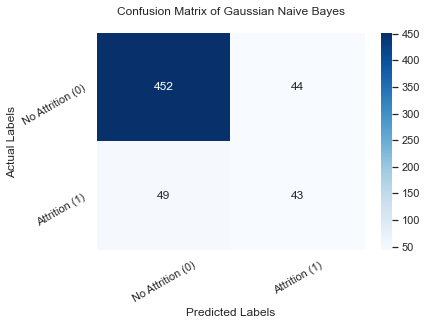

In [303]:
# Confusion Matrix of Gaussian NB
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(conf_mat_gnb, annot = True , fmt = 'd', xticklabels = ['No Attrition (0)', 'Attrition (1)'], yticklabels = ['No Attrition (0)', 'Attrition (1)'], cmap = 'Blues')
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Gaussian Naive Bayes\n')
plt.show()

In [335]:
# Classification Report of Gaussian NB
report_gnb = classification_report(y_test, y_pred_gnb)
print('Classification Report of Gaussian Naive Bayes Classifier :\n',report_gnb)

Classification Report of Gaussian Naive Bayes Classifier :
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       496
           1       0.49      0.47      0.48        92

    accuracy                           0.84       588
   macro avg       0.70      0.69      0.69       588
weighted avg       0.84      0.84      0.84       588



AUC of ROC Curve for Gaussian Naive Bayes Model =  77.04 %


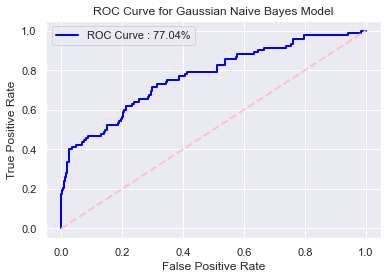

In [310]:
# ROC-AUC Curve of class 1 for Gaussian Naive Bayes model
y_prob_gnb = gau_nb.predict_proba(x_test)
df_y_prob_gnb = pd.DataFrame(y_prob_gnb, columns = ['Prob(0)', 'Prob(1)'])
df_y_prob_gnb
y_prob1_gnb = df_y_prob_gnb['Prob(1)'] # Prob. values of samples for class 1 will be required to input it to the roc-curve and auc score

fpr, tpr, thresholds = roc_curve(y_test, y_prob1_gnb)
auc_gnb = round(roc_auc_score(y_test, y_prob1_gnb)*100,2)
print('AUC of ROC Curve for Gaussian Naive Bayes Model = ',auc_gnb,'%')

# Plotting ROC Curve
plt.plot(fpr, tpr, linestyle = '-', label = f'ROC Curve : {auc_gnb}%', color = 'blue', linewidth = 2)
plt.plot([0,1],[0,1], linestyle = '--', color = 'pink', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes Model')
plt.legend()
plt.show()

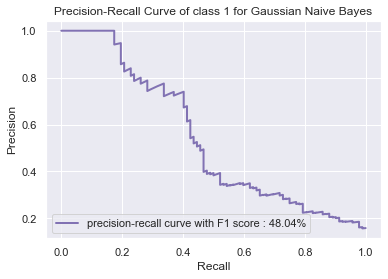

In [329]:
# Precision-Recall Curve for KNN
from sklearn.metrics import precision_recall_curve, f1_score
f1 = round(f1_score(y_test, y_pred_gnb)*100,2)
precision , recall , thresholds = precision_recall_curve(y_test, y_prob1_gnb)
plt.plot(recall, precision, linestyle = '-', label = f'precision-recall curve with F1 score : {f1}%', color = 'm', linewidth = 2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of class 1 for Gaussian Naive Bayes')
plt.legend()
plt.show()

- Precision - Recall Curve is very good tool to evaluate model's performance in case of highly imbalanced datasets of binary classification.
- Precision - Recall Curve for class 1 helps to evaluate the model's performance in predicting positive(1) class, which is our prime focus in this problem statement.

###### Comparision among all above models and chossing the best model for our case

- We will form DataFrame to make comparision in structured view.
- Row Values : Accuracy, Precision, Recall, F1, AUC
- Column Values : Decision Tree, Random Forest, SVM Classifier, Logistic Regression, KNN, GaussianNB
- Based on this DataFrame, we will do our analysis.

In [336]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [337]:
# Decision Tree matrix scores
acc_dt = round(accuracy_score(y_test, y_pred)*100,2)
pre_dt = round(precision_score(y_test, y_pred)*100,2)
re_dt = round(recall_score(y_test, y_pred)*100,2)
f1_dt = round(f1_score(y_test, y_pred)*100,2)
auc_dt = auc

In [338]:
# Random Forest matrix scores
acc_rf = round(accuracy_score(y_test, y_pred_rf)*100,2)
pre_rf = round(precision_score(y_test, y_pred_rf)*100,2)
re_rf = round(recall_score(y_test, y_pred_rf)*100,2)
f1_rf = round(f1_score(y_test, y_pred_rf)*100,2)
auc_rf = auc_score_rf

In [339]:
# SVM Classifier matrix scores
acc_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)
pre_svm = round(precision_score(y_test, y_pred_svm)*100,2)
re_svm = round(recall_score(y_test, y_pred_svm)*100,2)
f1_svm = round(f1_score(y_test, y_pred_svm)*100,2)
auc_svm = auc_svm

In [340]:
# Logistic Regression matrix scores
acc_logr = round(accuracy_score(y_test, y_pred_logr)*100,2)
pre_logr = round(precision_score(y_test, y_pred_logr)*100,2)
re_logr = round(recall_score(y_test, y_pred_logr)*100,2)
f1_logr = round(f1_score(y_test, y_pred_logr)*100,2)
auc_logr = auc_logr

In [341]:
# KNN Classifier matrix scores
acc_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
pre_knn = round(precision_score(y_test, y_pred_knn)*100,2)
re_knn = round(recall_score(y_test, y_pred_knn)*100,2)
f1_knn = round(f1_score(y_test, y_pred_knn)*100,2)
auc_knn = auc_knn

In [342]:
# Gaussian Naive Bayes Classifier matrix scores
acc_gnb = round(accuracy_score(y_test, y_pred_gnb)*100,2)
pre_gnb = round(precision_score(y_test, y_pred_gnb)*100,2)
re_gnb = round(recall_score(y_test, y_pred_gnb)*100,2)
f1_gnb = round(f1_score(y_test, y_pred_gnb)*100,2)
auc_gnb = auc_gnb

In [345]:
# Forming comparision DataFrame
comp_dic = {'Decision Tree Classifier' : [acc_dt, pre_dt, re_dt, f1_dt, auc_dt], 'Random Forest Classifer' : [acc_rf, pre_rf, re_rf, f1_rf, auc_rf],
           'Support Vector Classifer' : [acc_svm, pre_svm, re_svm, f1_svm, auc_svm], 'Logistic Regression' : [acc_logr, pre_logr, re_logr, f1_logr, auc_logr],
           'K Nearest Neighbor Classifier' : [acc_knn, pre_knn, re_knn, f1_knn, auc_knn], 'Gaussian Naive Bayes' : [acc_gnb, pre_gnb, re_gnb, f1_gnb, auc_gnb]}

df_comp = pd.DataFrame(comp_dic, index = ['Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1(%)', 'AUC(%)'])
df_comp

Decision Tree Classifier  Random Forest Classifer  \
Accuracy(%)                      93.20                    87.93   
Precision(%)                     82.50                   100.00   
Recall(%)                        71.74                    22.83   
F1(%)                            76.74                    37.17   
AUC(%)                           80.66                    97.16   

              Support Vector Classifer  Logistic Regression  \
Accuracy(%)                      96.60                87.59   
Precision(%)                     87.50                70.21   
Recall(%)                        91.30                35.87   
F1(%)                            89.36                47.48   
AUC(%)                           92.89                80.66   

              K Nearest Neighbor Classifier  Gaussian Naive Bayes  
Accuracy(%)                           87.24                 84.18  
Precision(%)                          68.09                 49.43  
Recall(%)                             34.78                 46.74  
F1(%)                                 46.04                 48.04  
AUC(%)                                83.59                 77.04

- Support Vector Classifier has the highest accuracy among all (96.6%) and second highest accuracy of Decision Tree classifier(93.2%)
- Since this dataset is class imbalanced, high accuracy of model may not give the complete picture, so we have to focus on other evaluation metrices.
- Random Forest Classifier has the highest precision (100%) among all models and Support Vector classifer having second highest precision (87.5 %)
- Support Vector Classifier has the highest recall score (91.3%) among all and Decision Tree classifier having second highest (71.74).
- F1 Score is better evaluation matrix for imbalanced dataset as it strikes balance between precision and recall value.
- Support Vector Classifier has the highest F1 Score (89.36 %) and Decision Tree second Highest (76.74%)
- Random Forest has the highest AUC score (97.16%) and Support Vector classifer second highest (92.89%).
- So, overall Support Vector Classifier wins the race with highest F1 Score, recall score and we will select this model for further implementation.